<a href="https://colab.research.google.com/github/Atharva-Gaykar/Deep_Learning/blob/main/notebooks/tabular_data/heart_attack_levels_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

## ❤️ Through this project: Heart Attack Risk Level Classification Using ANN Ensemble

* Built a **multi-class classification model** to predict the risk of heart attack in three categories:

  * `0` → **High Risk**
  * `1` → **Moderate Risk**
  * `2` → **Low Risk**

---

### 📋 Dataset Overview:

* Features included **clinical and lifestyle indicators** such as:

  * Age, blood pressure, cholesterol, fasting blood sugar, ECG results, etc.
* The `output` label was **numerically encoded**:

  * `High (0)`, `Moderate (1)`, `Low (2)`
* Detected **class imbalance** — fewer examples for `High` risk compared to `Low`.

---

### 🧠 Model Strategy: ANN + Ensemble Learning

* Developed **multiple Artificial Neural Networks** with varied configurations:

  * Different numbers of hidden layers and neurons
  * Varying dropout rates and activation functions
* Combined predictions using a **voting-based ensemble** to improve robustness.

---

### 🤖 Why I Used an Ensemble:

* Single model struggled to generalize due to **class imbalance**
* Ensemble helped:

  * **Boost recall** for the minority class (`High Risk`)
  * **Reduce variance** and improve **overall generalization**
* Voting ensemble used the **majority predicted class** from multiple ANN models.

---

### 📈 Results and Insights:

* Evaluated with:

  * **Accuracy**
  * **Class-wise Precision, Recall, and F1-Score**
  * **Confusion Matrix**
* Ensemble significantly improved **recall on High Risk class**, which is **crucial in medical applications**.
* Learned the importance of **model diversity** and **class balancing techniques** in healthcare data.

---



ACTIVATION FUNCTION USED

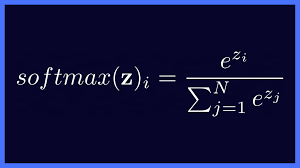

LOSS FUNCTION USED

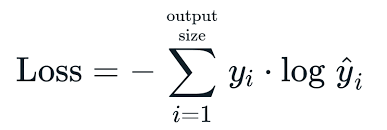

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
raw_dt=pd.read_csv("/content/drive/MyDrive/Heart_Attack_Risk_Levels_Dataset.csv")
raw_dt

Mounted at /content/drive


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level,Recommendation
0,63,1,66,160,83,160.0,1.80,0.012,negative,Moderate,Monitor closely and consult doctor
1,20,1,94,98,46,296.0,6.75,1.060,positive,High,Immediate medical attention
2,56,1,64,160,77,270.0,1.99,0.003,negative,Moderate,Monitor closely and consult doctor
3,66,1,70,120,55,270.0,13.87,0.122,positive,High,Immediate medical attention
4,54,1,64,112,65,300.0,1.08,0.003,negative,Moderate,Monitor closely and consult doctor
...,...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative,Moderate,Monitor closely and consult doctor
1315,66,1,84,125,55,149.0,1.33,0.172,positive,High,Immediate medical attention
1316,45,1,85,168,104,96.0,1.24,4.250,positive,High,Immediate medical attention
1317,54,1,58,117,68,443.0,5.80,0.359,positive,High,Immediate medical attention


In [ ]:
raw_dt['Result'].value_counts()

,count
Result,
positive,810
negative,509


In [ ]:
raw_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
 9   Risk_Level                1319 non-null   object 
 10  Recommendation            1319 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 113.5+ KB


In [ ]:
raw_dt['Risk_Level'].value_counts()

,count
Risk_Level,
High,812
Low,275
Moderate,232


In [ ]:
process_dt=raw_dt.copy()
process_dt.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level,Recommendation
0,63,1,66,160,83,160.0,1.80,0.012,negative,Moderate,Monitor closely and consult doctor
1,20,1,94,98,46,296.0,6.75,1.060,positive,High,Immediate medical attention
2,56,1,64,160,77,270.0,1.99,0.003,negative,Moderate,Monitor closely and consult doctor
3,66,1,70,120,55,270.0,13.87,0.122,positive,High,Immediate medical attention
4,54,1,64,112,65,300.0,1.08,0.003,negative,Moderate,Monitor closely and consult doctor


In [ ]:
process_dt.drop(['Recommendation'],axis=1,inplace=True)
process_dt.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level
0,63,1,66,160,83,160.0,1.80,0.012,negative,Moderate
1,20,1,94,98,46,296.0,6.75,1.060,positive,High
2,56,1,64,160,77,270.0,1.99,0.003,negative,Moderate
3,66,1,70,120,55,270.0,13.87,0.122,positive,High
4,54,1,64,112,65,300.0,1.08,0.003,negative,Moderate


In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
process_dt['Risk_Level'] = le.fit_transform(process_dt['Risk_Level'])
process_dt


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level
0,63,1,66,160,83,160.0,1.80,0.012,negative,2
1,20,1,94,98,46,296.0,6.75,1.060,positive,0
2,56,1,64,160,77,270.0,1.99,0.003,negative,2
3,66,1,70,120,55,270.0,13.87,0.122,positive,0
4,54,1,64,112,65,300.0,1.08,0.003,negative,2
...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative,2
1315,66,1,84,125,55,149.0,1.33,0.172,positive,0
1316,45,1,85,168,104,96.0,1.24,4.250,positive,0
1317,54,1,58,117,68,443.0,5.80,0.359,positive,0


In [ ]:
process_dt['Risk_Level'].value_counts()

,count
Risk_Level,
0,812
1,275
2,232


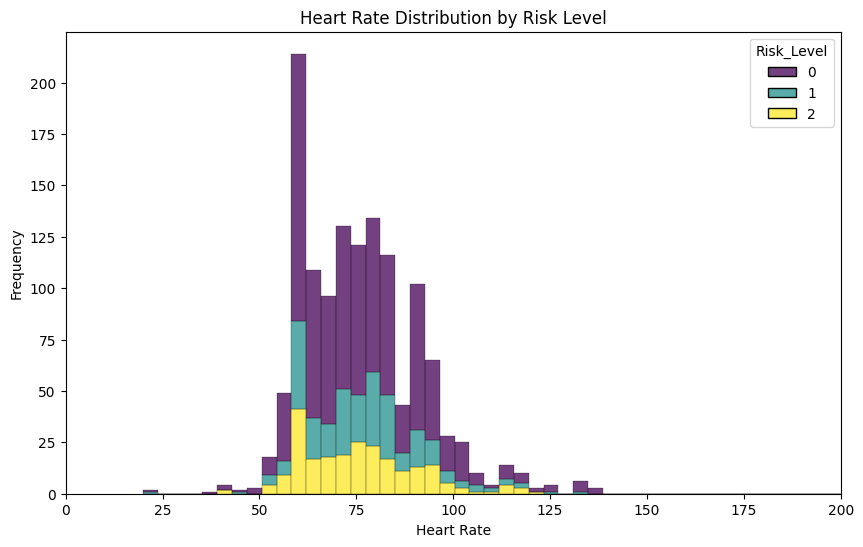

In [ ]:


plt.figure(figsize=(10, 6))
sns.histplot(data=process_dt, x='Heart rate', hue='Risk_Level', multiple='stack', palette='viridis')
plt.title('Heart Rate Distribution by Risk Level')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.xlim(0,200)
plt.show()


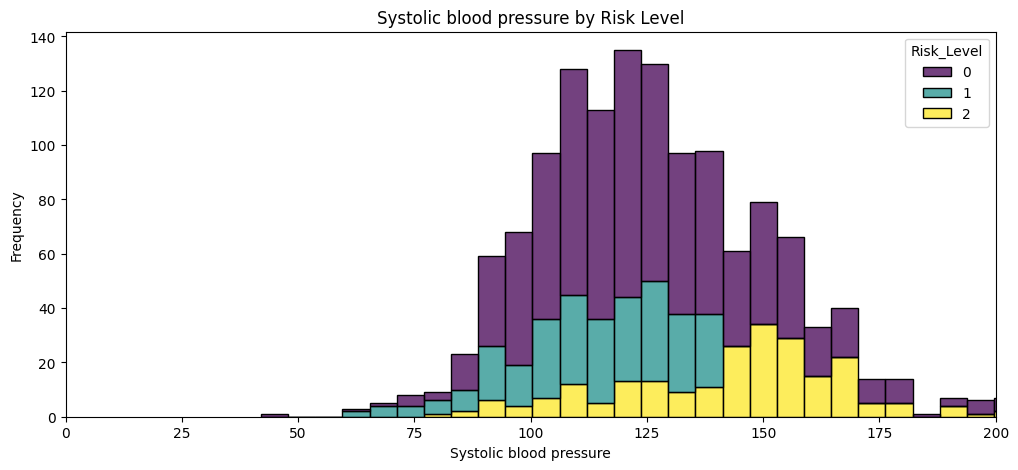

In [ ]:

plt.figure(figsize=(12, 5))
sns.histplot(data=process_dt, x='Systolic blood pressure', hue='Risk_Level', multiple='stack', palette='viridis')
plt.title('Systolic blood pressure by Risk Level')
plt.xlabel('Systolic blood pressure')
plt.ylabel('Frequency')
plt.xlim(0,200)
plt.show()

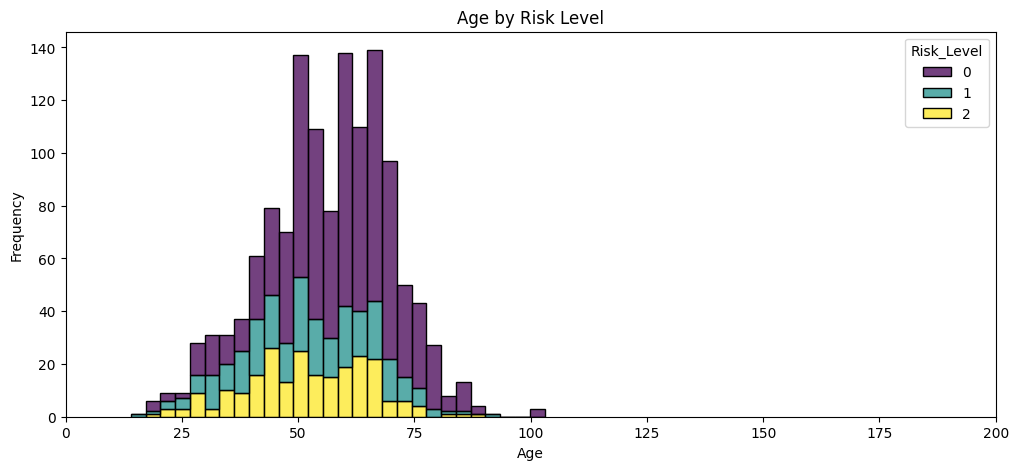

In [ ]:

plt.figure(figsize=(12, 5))
sns.histplot(data=process_dt, x='Age', hue='Risk_Level', multiple='stack', palette='viridis')
plt.title('Age by Risk Level')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0,200)
plt.show()

In [ ]:


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
process_dt['Result'] = le.fit_transform(process_dt['Result'])
process_dt

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level
0,63,1,66,160,83,160.0,1.80,0.012,0,2
1,20,1,94,98,46,296.0,6.75,1.060,1,0
2,56,1,64,160,77,270.0,1.99,0.003,0,2
3,66,1,70,120,55,270.0,13.87,0.122,1,0
4,54,1,64,112,65,300.0,1.08,0.003,0,2
...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0,2
1315,66,1,84,125,55,149.0,1.33,0.172,1,0
1316,45,1,85,168,104,96.0,1.24,4.250,1,0
1317,54,1,58,117,68,443.0,5.80,0.359,1,0


In [ ]:
process_dt['Result'].value_counts()

,count
Result,
1,810
0,509


In [ ]:
columns_displot=process_dt.columns.to_list()
columns_displot.remove('Risk_Level')
columns_displot.remove('Result')
columns_displot.remove('Gender')
columns_displot

['Age',
 'Heart rate',
 'Systolic blood pressure',
 'Diastolic blood pressure',
 'Blood sugar',
 'CK-MB',
 'Troponin']

In [ ]:
from sklearn.model_selection import train_test_split


X = process_dt.drop(['Risk_Level','Result'], axis=1)
y = process_dt['Risk_Level']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (923, 8) (923,)
Validation set shape: (198, 8) (198,)
Test set shape: (198, 8) (198,)


In [ ]:

X_train_copy = X_train.copy()




---

## 📊 Box Plot & Outlier Detection – Key Formulas

A **box plot** visually represents the **spread and central tendency** of data using **percentiles**. It also helps detect **outliers**.

---

### 🔹 **Key Terms and Formulas:**

#### ✅ **1. Quartiles**

* **Q1 (1st Quartile)**: 25th percentile — value below which 25% of the data lies
* **Q2 (Median)**: 50th percentile — the middle value of the dataset
* **Q3 (3rd Quartile)**: 75th percentile — value below which 75% of the data lies

---

#### ✅ **2. Interquartile Range (IQR)**

$$
\text{IQR} = Q3 - Q1
$$

* Represents the **range of the middle 50%** of the data
* Measures the spread and helps detect how compact or dispersed the data is

---

#### ✅ **3. Outlier Thresholds**

$$
\text{Lower Bound} = Q1 - 1.5 \times \text{IQR}
$$

$$
\text{Upper Bound} = Q3 + 1.5 \times \text{IQR}
$$

* Any data point **less than the lower bound** or **greater than the upper bound** is considered an **outlier**

---





<ipython-input-18-b5db40ebd91f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


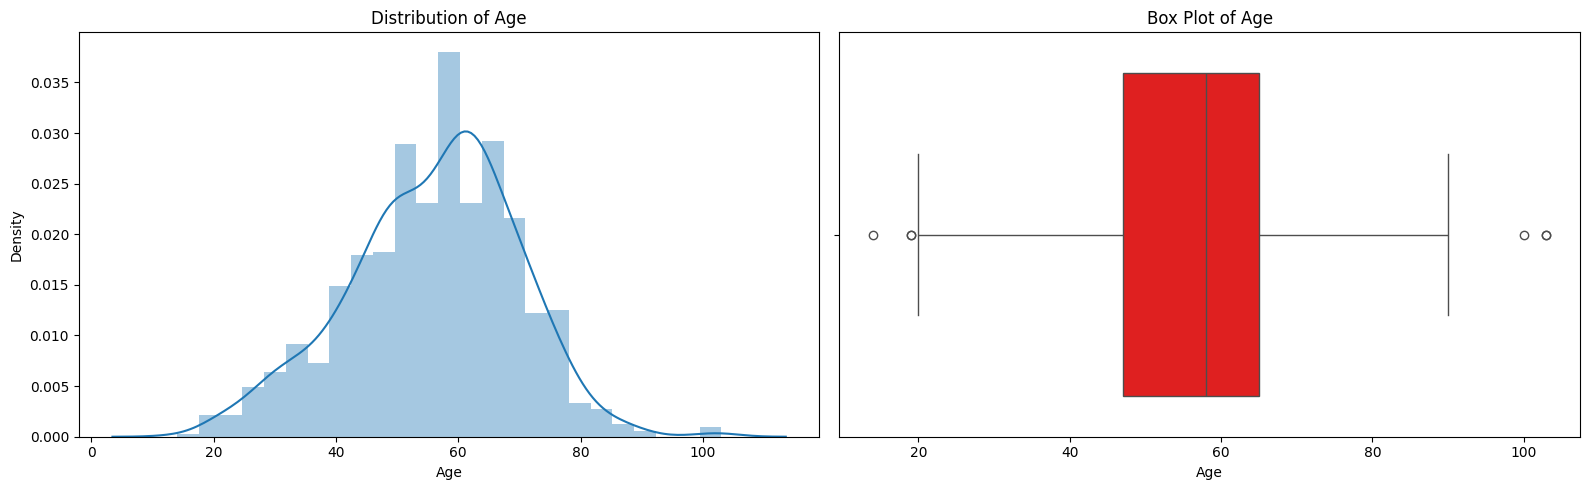

<ipython-input-18-b5db40ebd91f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


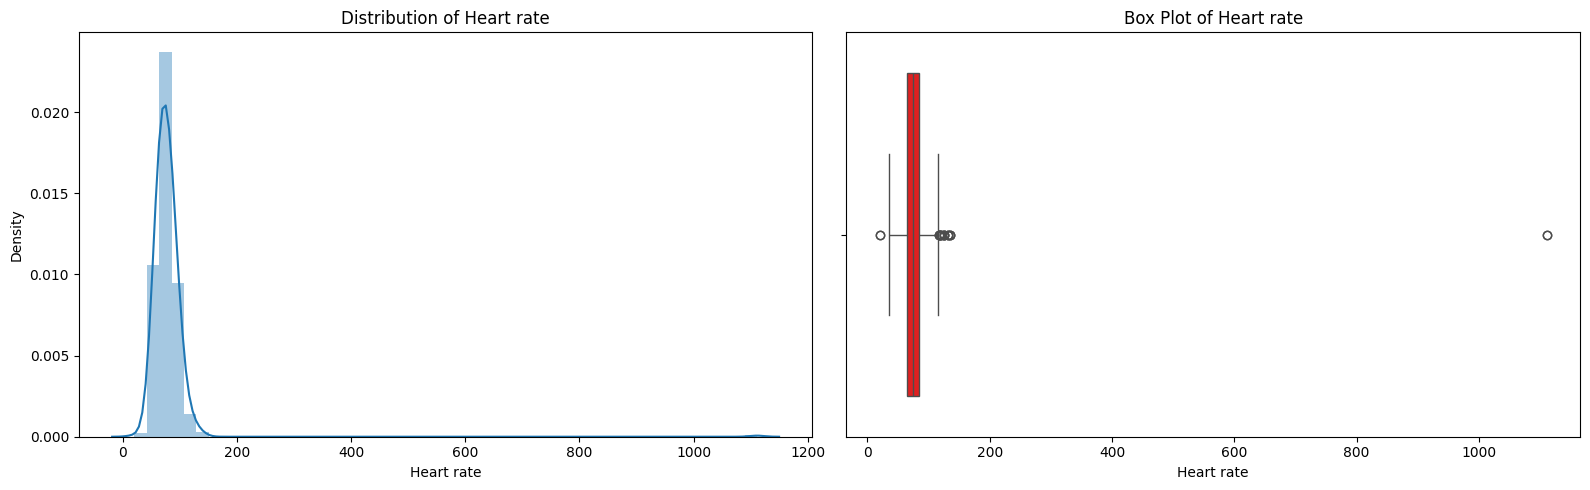

<ipython-input-18-b5db40ebd91f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


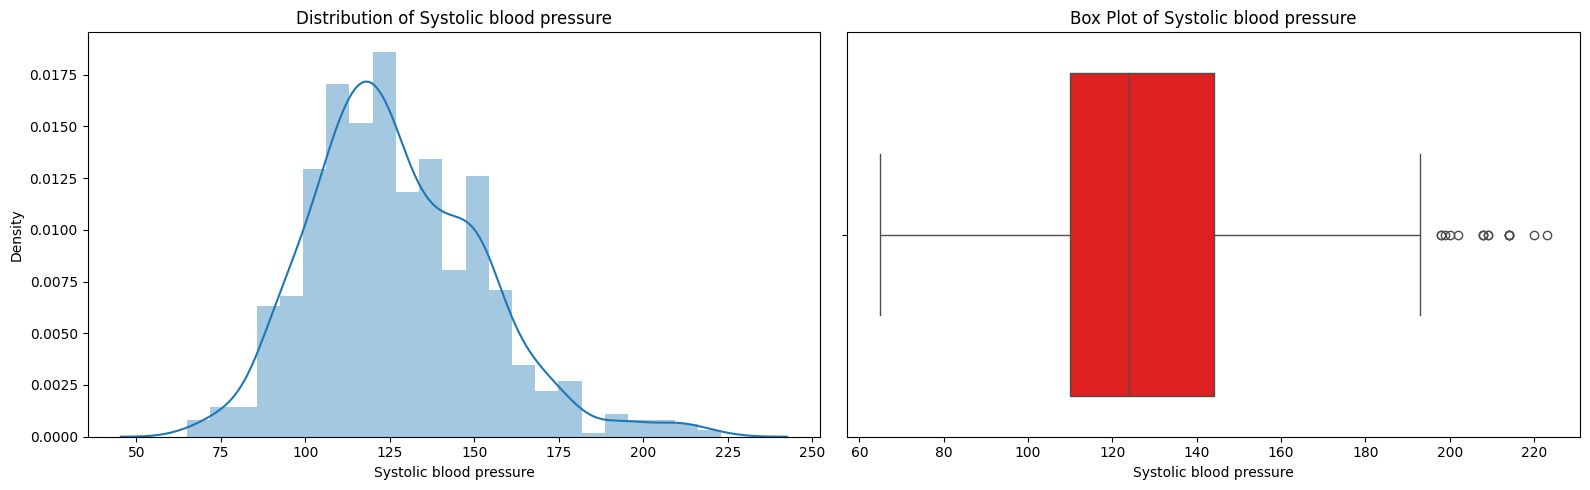

<ipython-input-18-b5db40ebd91f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


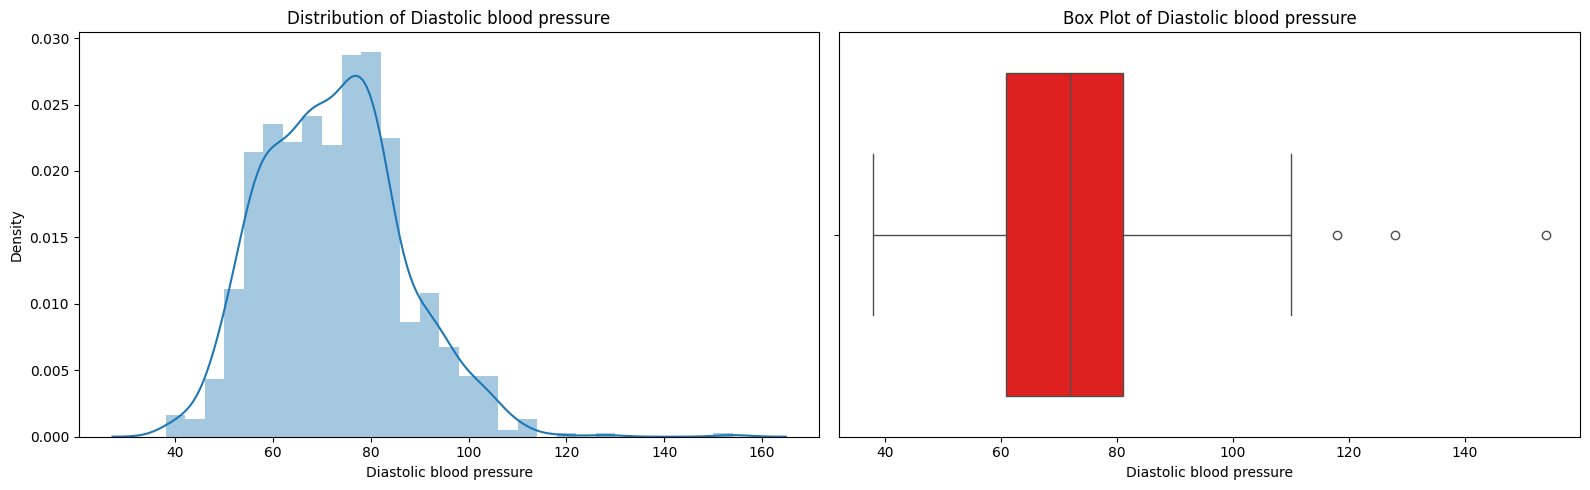

<ipython-input-18-b5db40ebd91f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


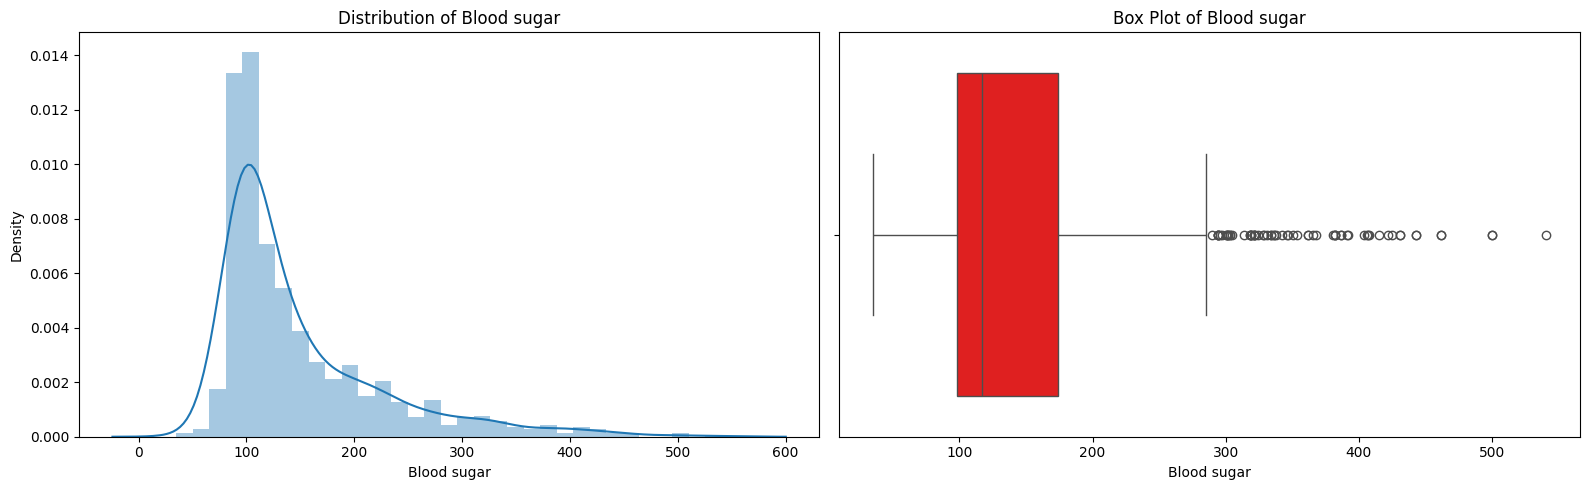

<ipython-input-18-b5db40ebd91f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


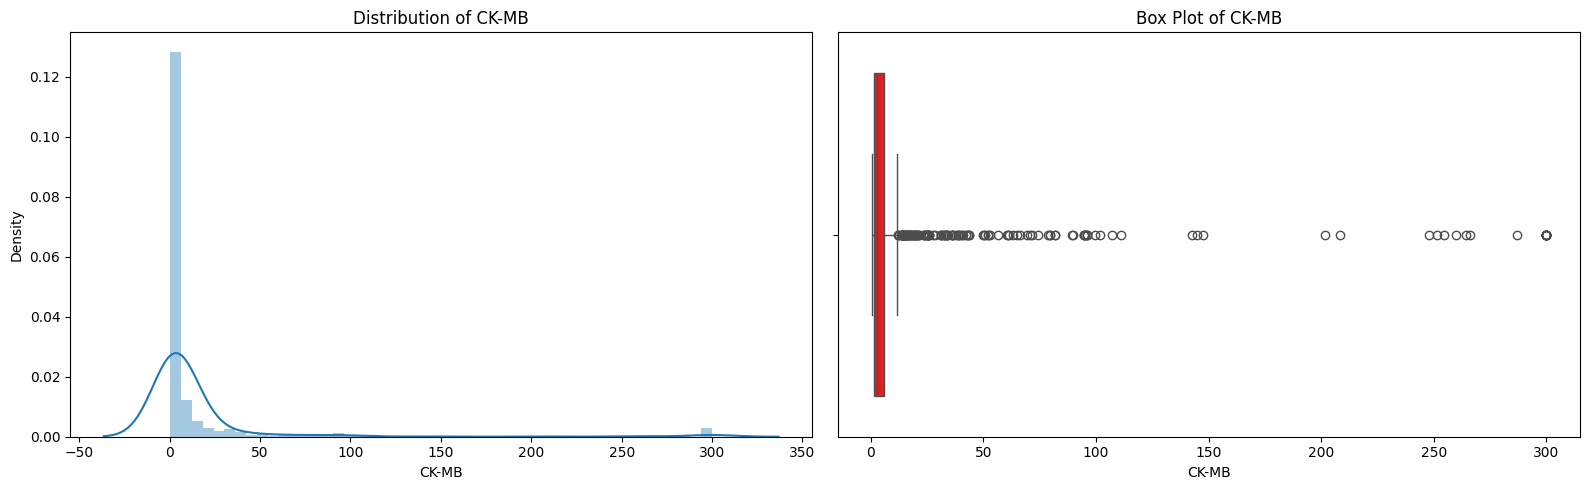

<ipython-input-18-b5db40ebd91f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


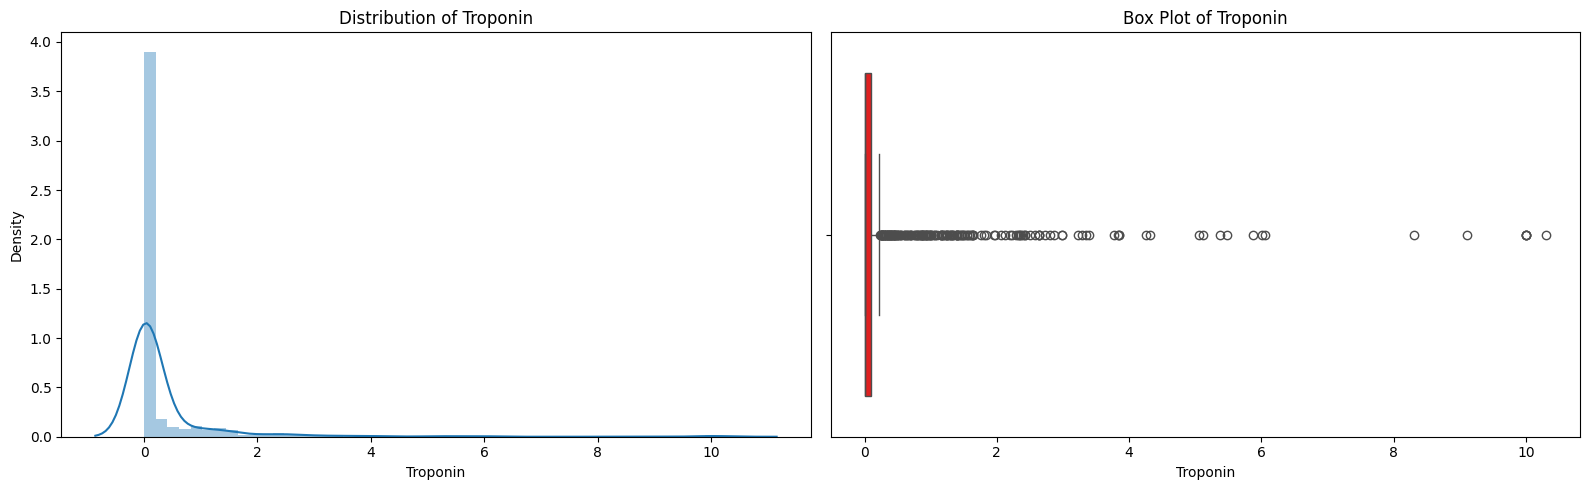

In [ ]:


for column in columns_displot:
    plt.figure(figsize=(16, 5))

    plt.subplot(1, 2, 1)
    sns.distplot(X_train[column], kde=True)
    plt.title(f'Distribution of {column}')


    plt.subplot(1, 2, 2)
    sns.boxplot(x=X_train[column], color="red")
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()
    print("\n")




---

## 📈 `sns.distplot()` — Visualizing Feature Distributions

* `sns.distplot()` is used to **visualize the distribution** of a numerical feature.
* Combines a **histogram** and **Kernel Density Estimate (KDE)** into a single plot for deeper insight.
* Helps understand:

  * The **shape** of the data (normal, skewed, multimodal, etc.)
  * **Central tendency** and **spread**
  * The presence of **gaps**, **outliers**, or **spikes** in the feature
* Useful for **deciding preprocessing steps**, like:

  * Whether to apply **scaling or transformation**
  * How to **bin or discretize** features
  * Whether the feature is suitable for **modeling as-is**
* Helps **compare features visually** for different classes when combined with `hue` or faceting.




In [ ]:
numericaL_dt=X_train.select_dtypes(include=np.number).columns.to_list()
numericaL_dt

['Age',
 'Gender',
 'Heart rate',
 'Systolic blood pressure',
 'Diastolic blood pressure',
 'Blood sugar',
 'CK-MB',
 'Troponin']

In [ ]:


X_train.loc[X_train['Age'] > 90, 'Age'] = 90

X_train.loc[X_train['Age'] < 20, 'Age'] = 20





Text(0.5, 1.0, 'Box Plot of Age')

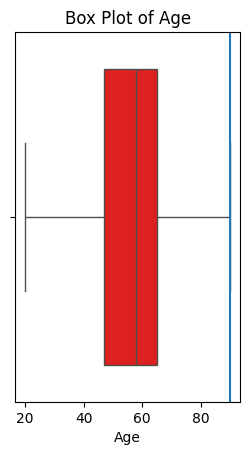

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(x=X_train['Age'], color="red")
plt.axvline(x=90)
plt.title(f'Box Plot of Age')

In [ ]:
for cols in numericaL_dt:
  print(f'{cols}:')
  print(X_train[cols].describe())
  print("\n")

Age:
count    923.000000
mean      55.910076
std       13.634664
min       20.000000
25%       47.000000
50%       58.000000
75%       65.000000
max       90.000000
Name: Age, dtype: float64


Gender:
count    923.000000
mean       0.658722
std        0.474396
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Gender, dtype: float64


Heart rate:
count     923.000000
mean       78.451788
std        50.488918
min        20.000000
25%        64.000000
50%        74.000000
75%        85.000000
max      1111.000000
Name: Heart rate, dtype: float64


Systolic blood pressure:
count    923.000000
mean     127.110509
std       25.546961
min       65.000000
25%      110.000000
50%      124.000000
75%      144.000000
max      223.000000
Name: Systolic blood pressure, dtype: float64


Diastolic blood pressure:
count    923.000000
mean      72.341278
std       14.173832
min       38.000000
25%       61.000000
50%       72.000000
75%       81.0

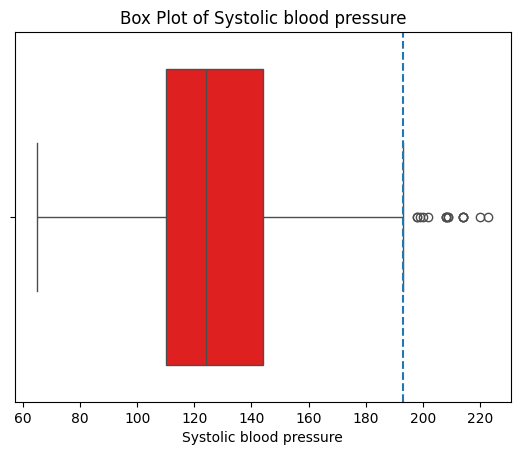

In [ ]:
sns.boxplot(x=X_train['Systolic blood pressure'], color="red")
plt.title(f'Box Plot of Systolic blood pressure')
plt.axvline(x=193,linestyle="dashed")
plt.show()

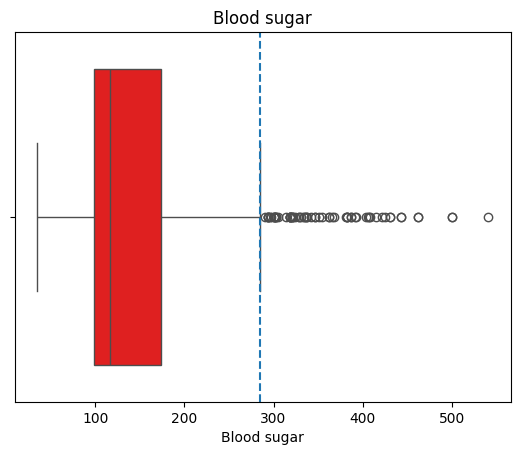

In [ ]:
sns.boxplot(x=X_train['Blood sugar'], color="red")
plt.title(f'Blood sugar')
plt.axvline(x=285,linestyle="dashed")
plt.show()

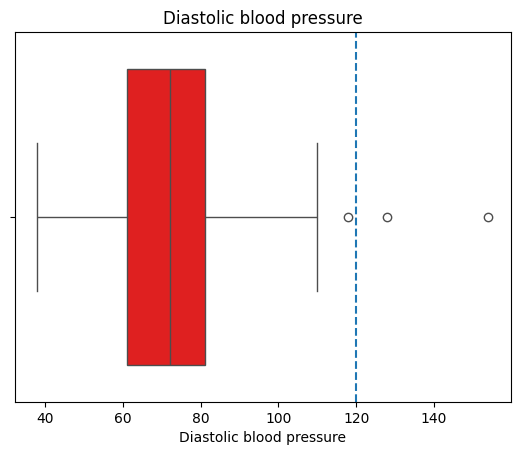

In [ ]:
sns.boxplot(x=X_train['Diastolic blood pressure'], color="red")
plt.title(f'Diastolic blood pressure')
plt.axvline(x=120, linestyle="dashed")
plt.show()

In [ ]:
  X_train.loc[X_train['Blood sugar'] >285, 'Blood sugar'] = 285

Condition	Low (Min) Value	High (Max) Value	Interpretation
Fasting	~50 mg/dL

 ⚠️	~130 mg/dL ❌	Normal: 70–99 mg/dL
Post-meal (2 hours)	~80 mg/dL ✅	~200–250 mg/dL ❌	Normal: <140 mg/dL
Random (any time)	~60 mg/dL ⚠️	~250–300+ mg/dL ❌	Normal: <140 mg/dL

In [ ]:
X_train.loc[X_train['Diastolic blood pressure'] >110, 'Diastolic blood pressure'] = 110

Diastolic BP (mmHg)	Category	Interpretation
< 60	🔻 Low (Hypotension)	May cause dizziness, fatigue, fainting — concerning if symptomatic.
60–79	✅ Normal	Ideal diastolic range for healthy adults.
80–89	⚠️ Elevated / Prehypertension	May progress to hypertension; lifestyle changes advised.
90–99	🚨 Stage 1 Hypertension	Requires monitoring and possibly treatment.
100–109	🚨 Stage 2 Hypertension	Likely needs medication + lifestyle changes.
≥ 110	🔴 Hypertensive Crisis	Emergency — risk of stroke, organ damage. Seek immediate care.

In [ ]:
X_train.loc[X_train['Systolic blood pressure'] >185, 'Systolic blood pressure'] = 185

Systolic BP (mmHg)	Category	Interpretation
< 90	🔻 Low (Hypotension)	May cause dizziness, fatigue, fainting — monitor for symptoms.
90–119	✅ Normal	Healthy range for adults.
120–129	⚠️ Elevated BP	At risk — lifestyle changes advised.
130–139	🚨 Stage 1 Hypertension	Requires monitoring; may need early intervention.
140–179	🚨 Stage 2 Hypertension	Needs medical attention — risk of heart and vascular disease.
≥ 180	🔴 Hypertensive Crisis	Emergency — seek immediate care (risk of stroke, heart attack).

In [ ]:
X_train

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
1156,64,0,117,112,74,146.0,2.880,0.088
1023,77,0,94,91,52,116.0,1.420,0.026
224,75,0,116,144,82,96.0,4.000,0.012
590,55,0,64,121,58,103.0,13.980,0.866
274,39,1,94,105,81,93.0,4.000,0.004
...,...,...,...,...,...,...,...,...
1095,50,0,85,119,76,130.0,16.100,0.009
1130,57,1,78,101,54,115.0,0.826,0.014
1294,50,0,79,92,55,285.0,16.950,0.005
860,54,1,72,154,84,127.0,2.970,0.007


<ipython-input-30-12b16b2e9c08>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Heart rate'])


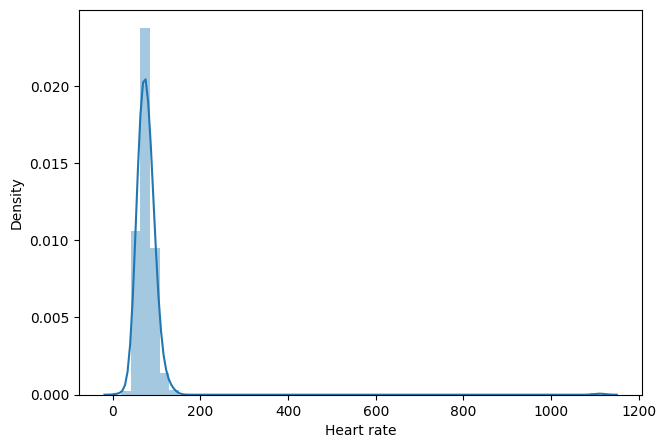

In [ ]:
plt.figure(figsize=(16,5))


plt.subplot(1,2,2)
sns.distplot(X_train['Heart rate'])

plt.show()

In [ ]:
X_train.loc[X_train['Heart rate'] >120, 'Heart rate'] = 120
X_train.loc[X_train['Heart rate'] <40, 'Heart rate'] = 40


40–60 bpm	✅ Bradycardia (slow heart rate) – Common in athletes; may be concerning if symptomatic (e.g., dizziness, fatigue).
60–100 bpm	✅ Normal resting heart rate – Typical range for a healthy adult at rest.
100–120 bpm	⚠️ Mild tachycardia – Could be due to stress, fever, dehydration, or early signs of cardiac or metabolic issues.
Above 120 bpm	🚨 Tachycardia (rapid heart rate) – May indicate arrhythmia, heart disease, or other serious medical conditions, especially if persistent at rest.

<ipython-input-32-20d737578b17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['CK-MB'])


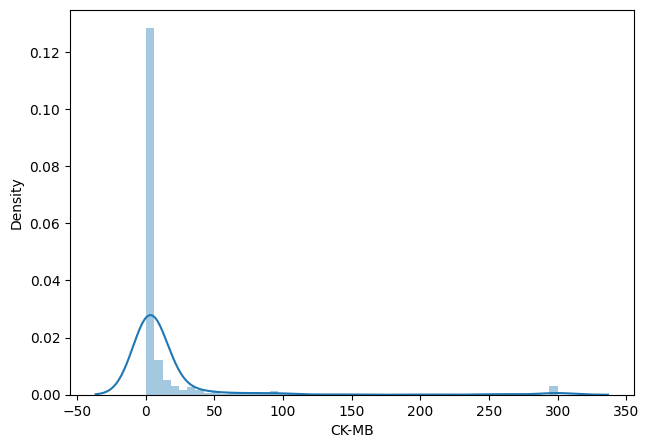

In [ ]:
plt.figure(figsize=(16,5))


plt.subplot(1,2,2)
sns.distplot(X_train['CK-MB'])

plt.show()

0–24 U/L: ✅ Normal range — This is typically considered normal, although exact reference ranges may vary slightly between laboratories.

25–50 U/L: ✅ Possible mild heart muscle injury — Slightly elevated CK-MB may indicate minor injury, like angina or early ischemia.

50–200 U/L: ✅ Myocardial infarction (heart attack) likely — Significantly elevated CK-MB suggests probable heart muscle damage (MI).

Above 200 U/L: ✅ Severe cardiac injury or muscle breakdown — Such high levels can point to major cardiac injury or even skeletal muscle damage (e.g., rhabdomyolysis).


In [ ]:
X_train.loc[X_train['CK-MB'] >210, 'CK-MB'] = 210

In [ ]:
X_train.loc[X_train['Troponin'] >2, 'Troponin'] = 2

🧪 Troponin Reference Ranges (ng/mL) Range Troponin I (cTnI) Troponin T (cTnT) Interpretation Normal < 0.04 ng/mL < 0.01 ng/mL No significant myocardial injury Gray zone 0.04–0.10 ng/mL 0.01–0.03 ng/mL Possible minor injury, observe trends Elevated > 0.10 ng/mL > 0.03 ng/mL Likely myocardial infarction if clinical symptoms and ECG changes present Critical > 1.0 ng/mL > 1.0 ng/mL Suggests significant myocardial damage or infarction

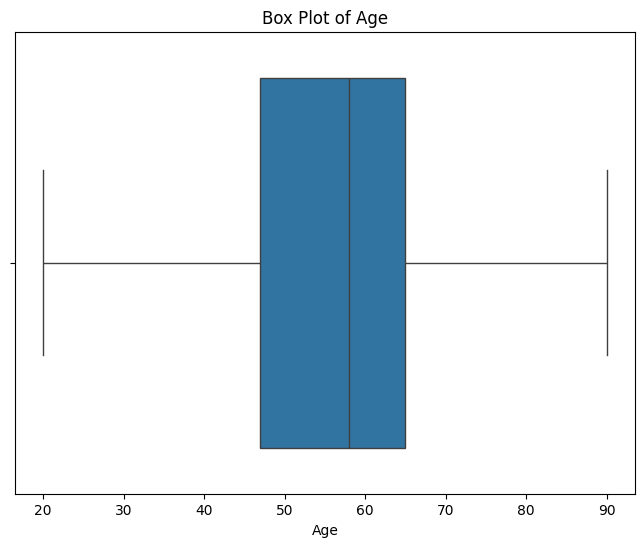

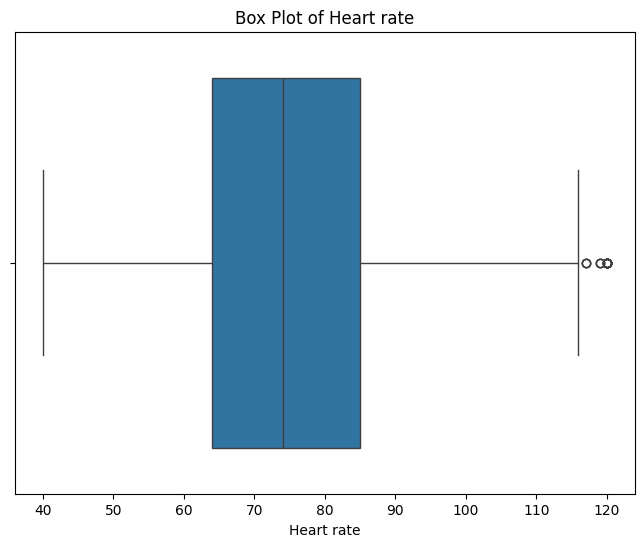

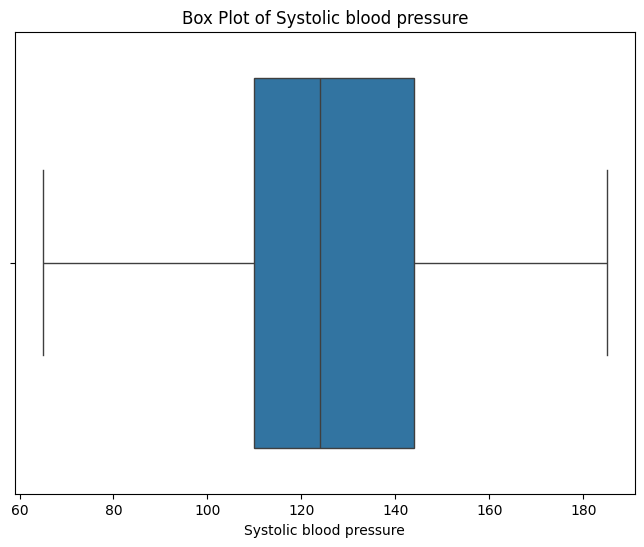

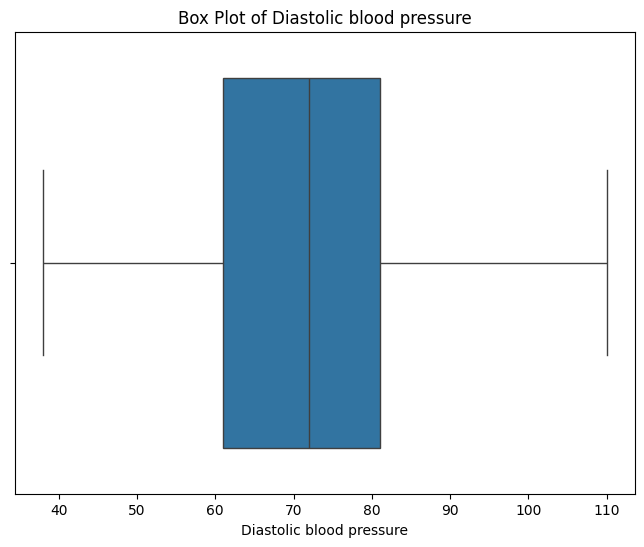

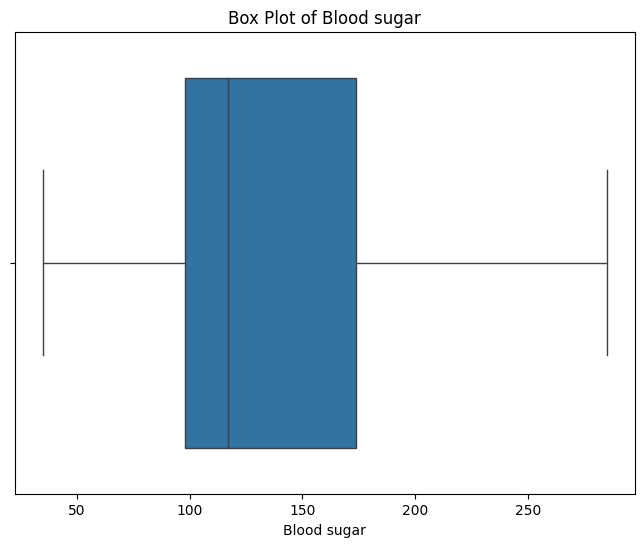

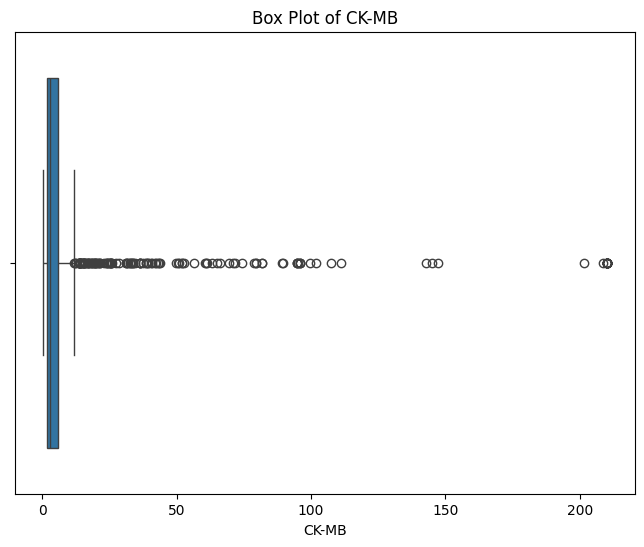

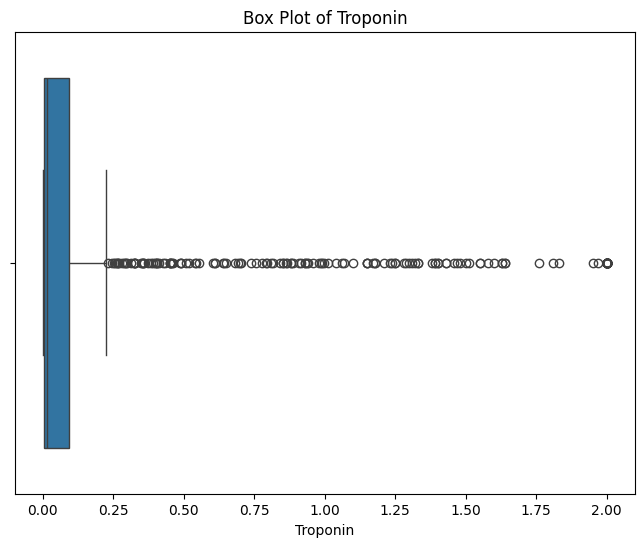

In [ ]:
for column in X_train.columns:
    if column != 'Gender':
     plt.figure(figsize=(8, 6))
     sns.boxplot(x=X_train[column])
     plt.title(f'Box Plot of {column}')
     plt.show()
     print("\n")

In [ ]:


from scipy import stats




<ipython-input-37-767453eb236d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Blood sugar'])


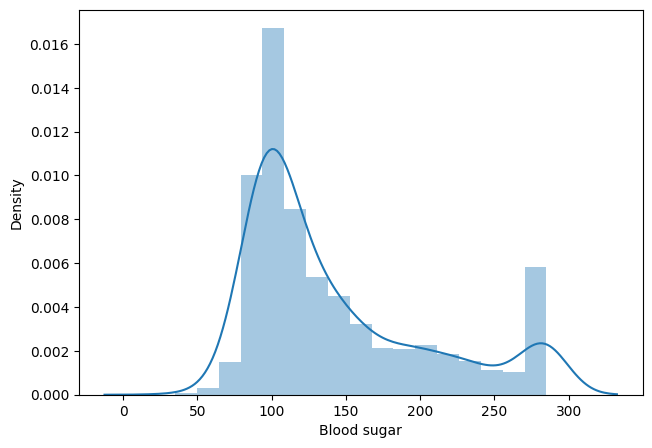

In [ ]:
plt.figure(figsize=(16,5))


plt.subplot(1,2,2)
sns.distplot(X_train['Blood sugar'])

plt.show()

In [ ]:
X_train['Blood sugar'].skew()

np.float64(1.116035377462543)




---

## 🔄 Feature Transformation: Box-Cox for Right-Skewed Data

* Detected **right-skewed distribution** in one or more features (e.g., cholesterol, age, etc.)
* Applied **Box-Cox Transformation** to make the data **more symmetric (Gaussian-like)**

---

### 📌 What is Box-Cox Transformation?

Box-Cox transforms a variable $X$ using the formula:

$$
X_{\text{transformed}} =
\begin{cases}
\frac{X^\lambda - 1}{\lambda}, & \text{if } \lambda \ne 0 \\
\ln(X), & \text{if } \lambda = 0
\end{cases}
$$

Where:

* $\lambda$ is a parameter automatically learned to best normalize the data.
* It works only if **all input values are positive**.

---

### ✅ Why I Used Box-Cox:

* My data was **right-skewed** → had a long tail on the right.
* Box-Cox helps to:

  * **Stabilize variance**
  * **Reduce skewness**
  * Improve **model accuracy** and **training stability**
* Beneficial for models like:

  * **Logistic Regression**
  * **ANN**
  * Any model assuming or benefiting from **normally distributed inputs**

---



<ipython-input-39-99f3bbc17120>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Blood sugar'])


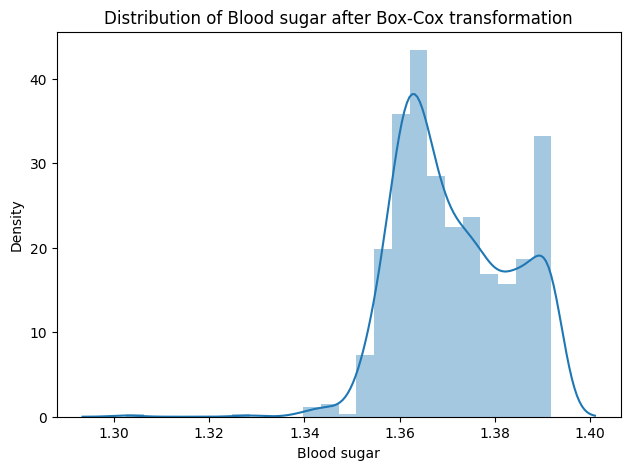

In [ ]:


X_train['Blood sugar'], lambda_ = stats.boxcox(X_train['Blood sugar'])

plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(X_train['Blood sugar'])
plt.title('Distribution of Blood sugar after Box-Cox transformation')
plt.show()




In [ ]:
X_train['Blood sugar'].skew()


np.float64(0.03040000459825097)

In [ ]:


from scipy import stats


X_train['Troponin'], lambda_ = stats.boxcox(X_train['Troponin'])




In [ ]:

from scipy import stats


X_train['CK-MB'], lambda_ = stats.boxcox(X_train['CK-MB'])

<ipython-input-43-c4fb37d69c63>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_copy[column], kde=True)
<ipython-input-43-c4fb37d69c63>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


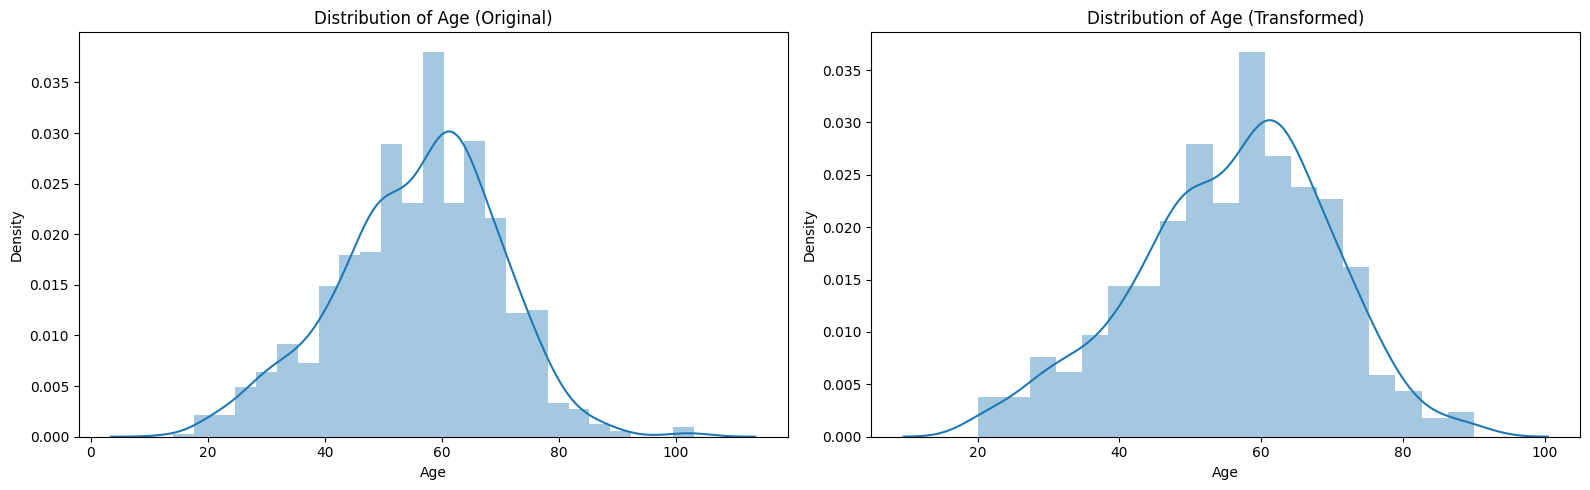

<ipython-input-43-c4fb37d69c63>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_copy[column], kde=True)
<ipython-input-43-c4fb37d69c63>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


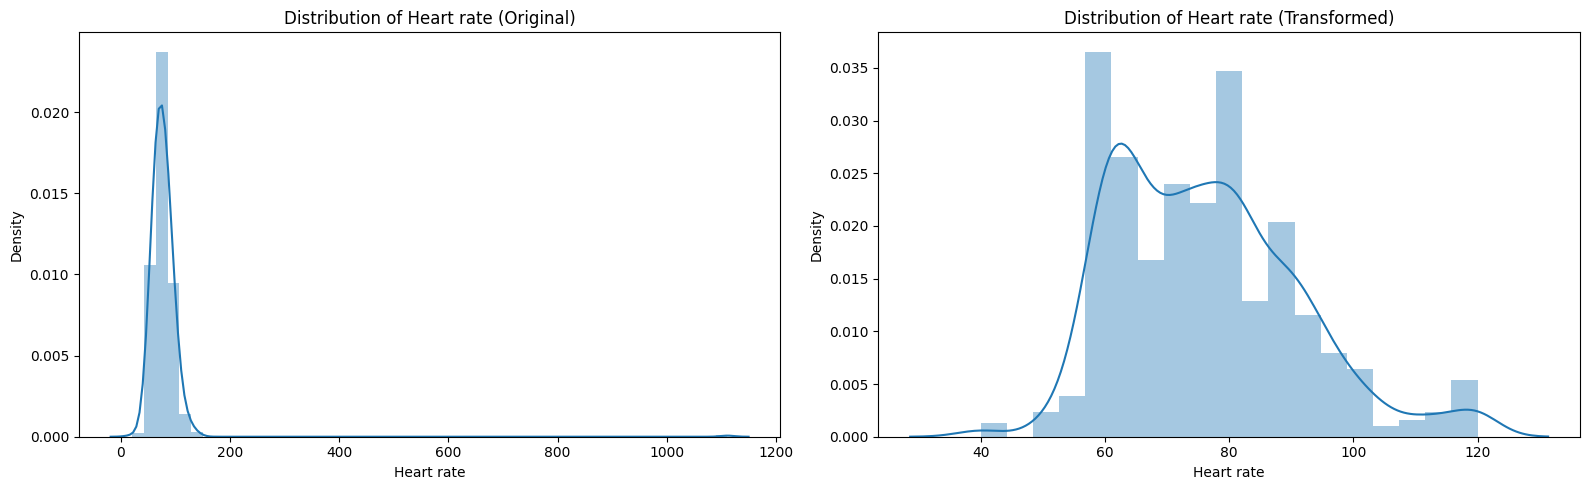

<ipython-input-43-c4fb37d69c63>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_copy[column], kde=True)
<ipython-input-43-c4fb37d69c63>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


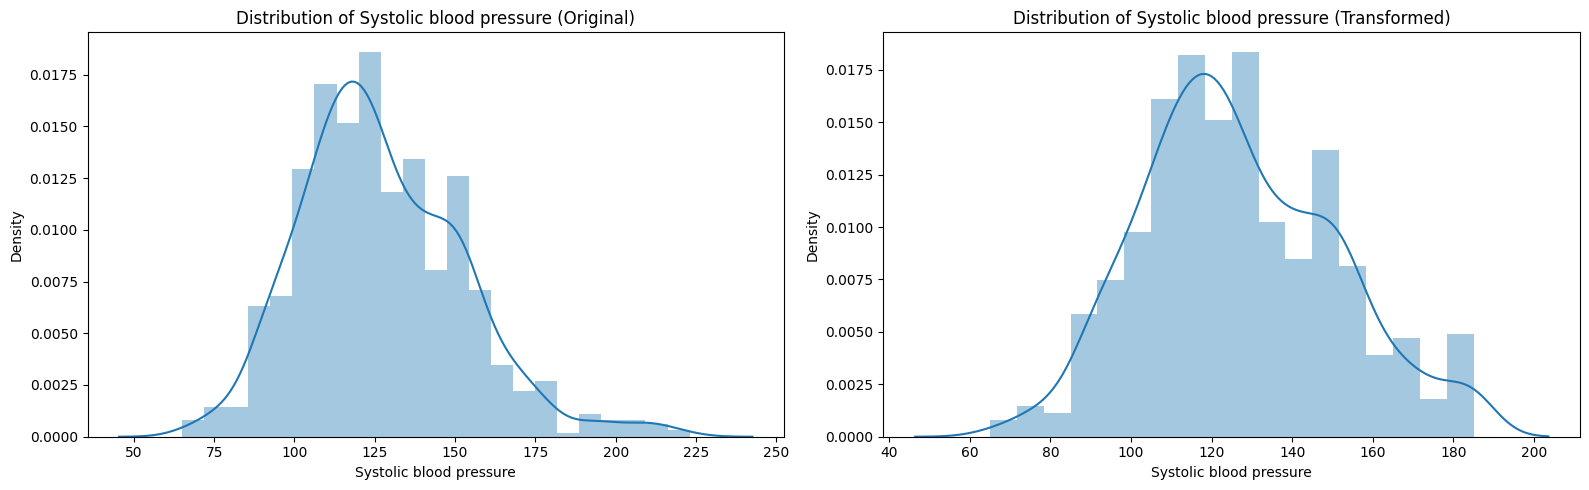

<ipython-input-43-c4fb37d69c63>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_copy[column], kde=True)
<ipython-input-43-c4fb37d69c63>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


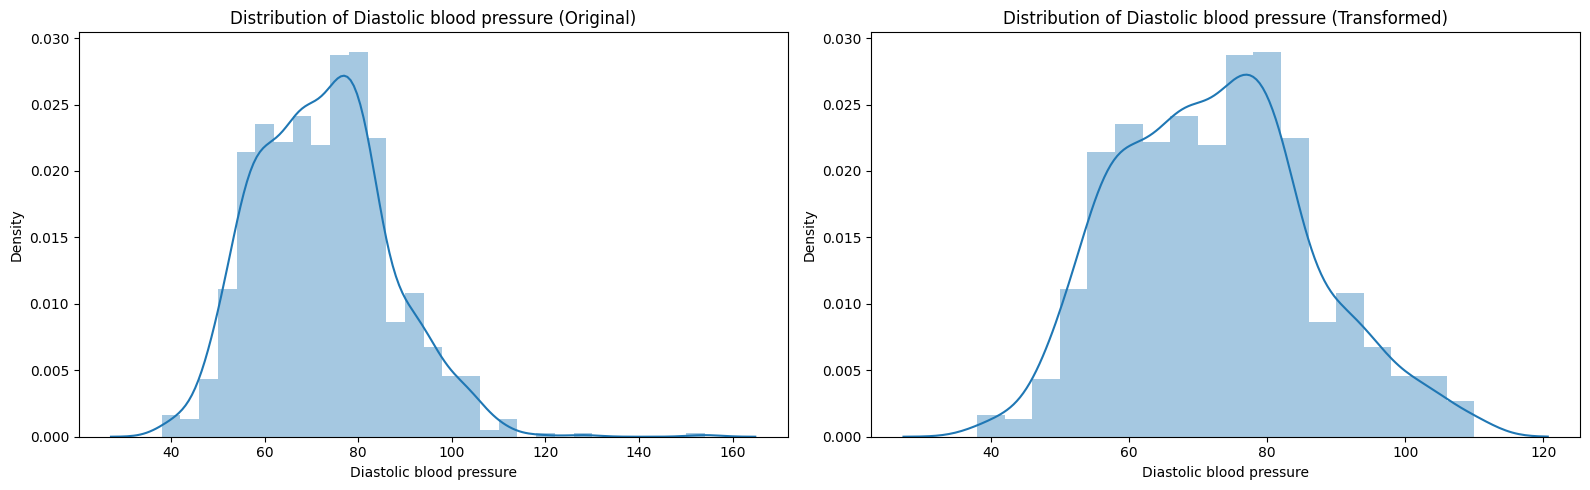

<ipython-input-43-c4fb37d69c63>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_copy[column], kde=True)
<ipython-input-43-c4fb37d69c63>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


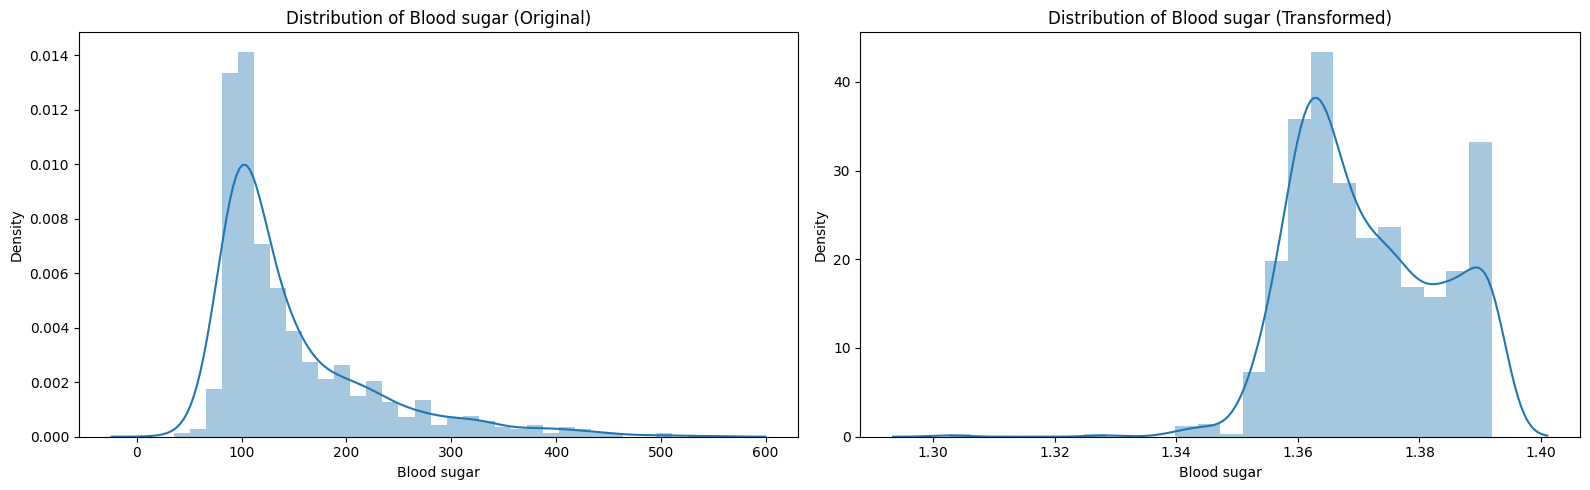

<ipython-input-43-c4fb37d69c63>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_copy[column], kde=True)
<ipython-input-43-c4fb37d69c63>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


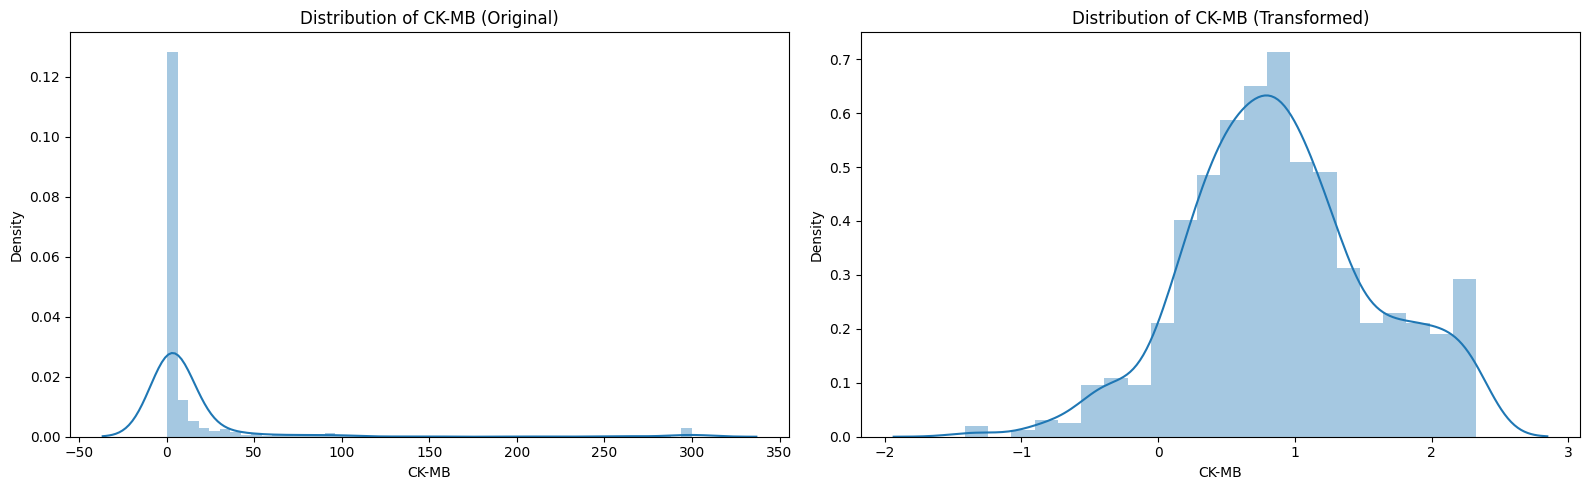

<ipython-input-43-c4fb37d69c63>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_copy[column], kde=True)
<ipython-input-43-c4fb37d69c63>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


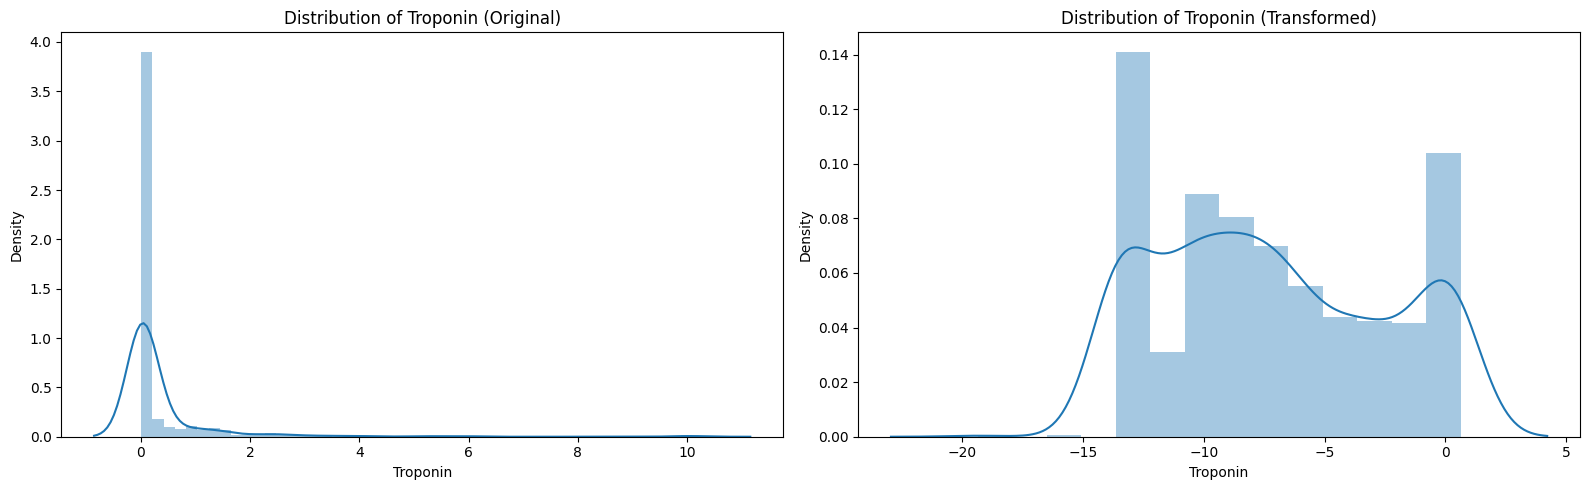

In [ ]:


for column in columns_displot:
    plt.figure(figsize=(16, 5))

    plt.subplot(1, 2, 1)
    sns.distplot(X_train_copy[column], kde=True)
    plt.title(f'Distribution of {column} (Original)')

    plt.subplot(1, 2, 2)
    sns.distplot(X_train[column], kde=True)
    plt.title(f'Distribution of {column} (Transformed)')

    plt.tight_layout()
    plt.show()
    print("\n")


In [ ]:
X_train

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
1156,64,0,117,112,74,1.375974,0.874980,-3.391049
1023,77,0,94,91,52,1.368538,0.328814,-6.093217
224,75,0,116,144,82,1.361449,1.083906,-8.308774
590,55,0,64,121,58,1.364196,1.682624,-0.146599
274,39,1,94,105,81,1.360164,1.083906,-12.332511
...,...,...,...,...,...,...,...,...
1095,50,0,85,119,76,1.372373,1.734346,-9.253846
1130,57,1,78,101,54,1.368234,-0.198099,-7.830759
1294,50,0,79,92,55,1.391853,1.752530,-11.419546
860,54,1,72,154,84,1.371612,0.895649,-10.139418


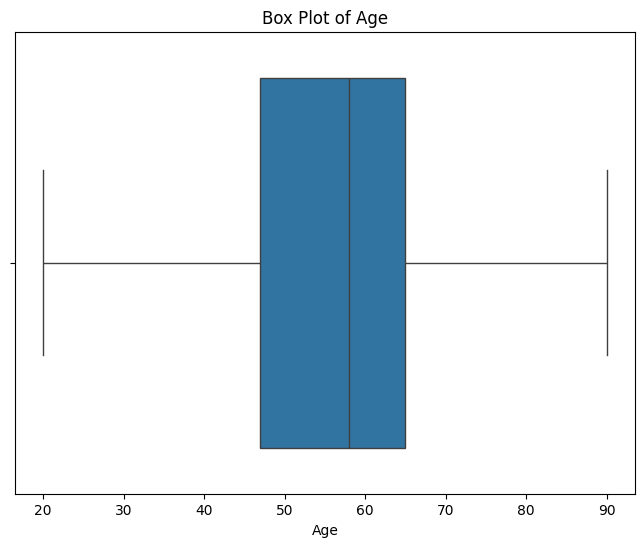

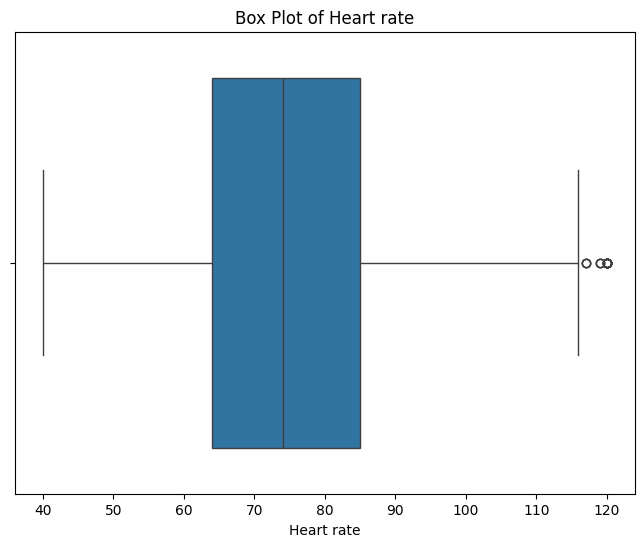

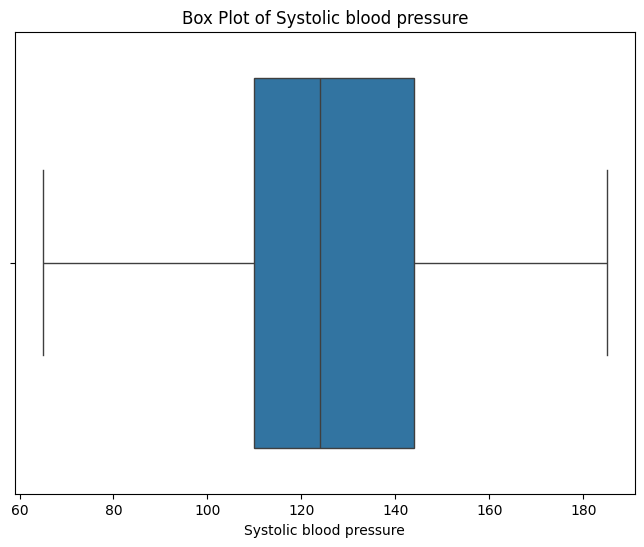

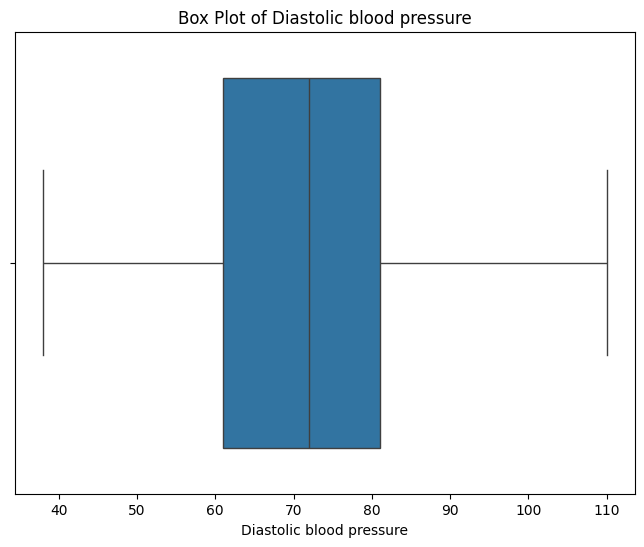

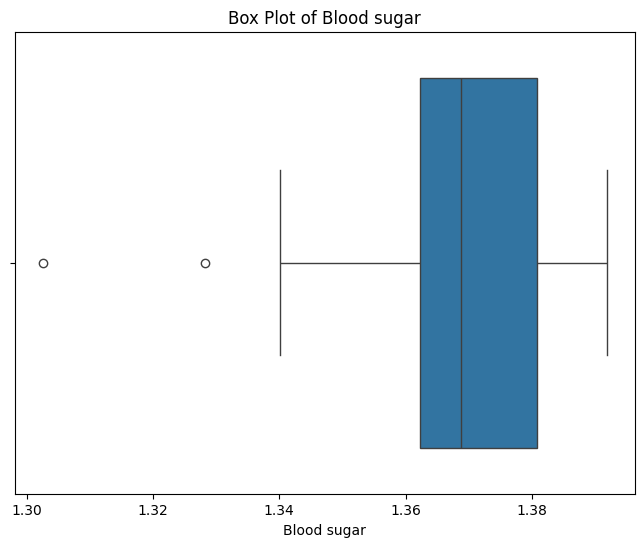

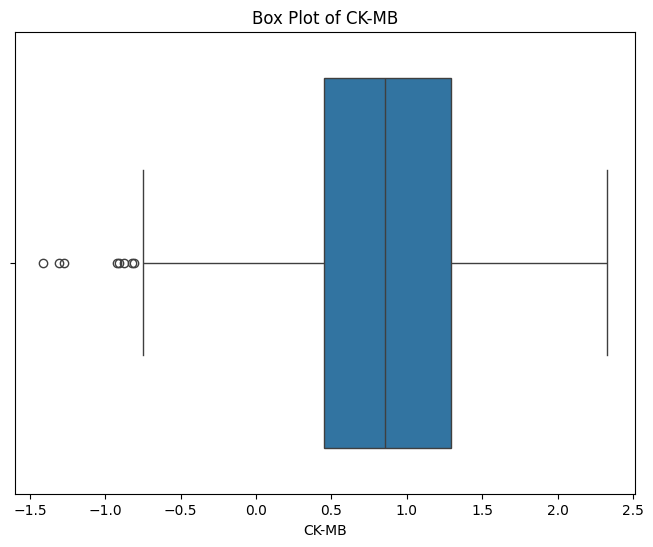

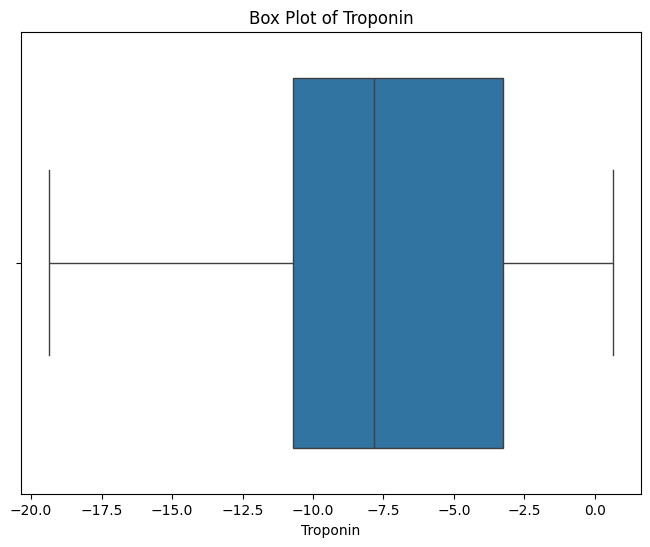

In [ ]:
for column in X_train.columns:
    if column != 'Gender':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=X_train[column])
        plt.title(f'Box Plot of {column}')
        plt.show()
        print("\n")




In [ ]:

Q1 = X_train['Heart rate'].quantile(0.25)
Q3 = X_train['Heart rate'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
X_train.loc[X_train['Heart rate'] >upper_limit, 'Heart rate'] = upper_limit
print(upper_limit)




116.5


<ipython-input-46-3379084b9592>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '116.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[X_train['Heart rate'] >upper_limit, 'Heart rate'] = upper_limit


In [ ]:
Q1 = X_train['Blood sugar'].quantile(0.25)
Q3 = X_train['Blood sugar'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1- 1.5 * IQR
X_train.loc[X_train['Blood sugar'] < lower_limit, 'Blood sugar'] = lower_limit
print(lower_limit)

1.334337081084831


In [ ]:



Q1 = X_train['CK-MB'].quantile(0.25)
Q3 = X_train['CK-MB'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
X_train.loc[X_train['CK-MB'] < lower_limit, 'CK-MB'] = lower_limit
lower_limit


np.float64(-0.8052709991152656)

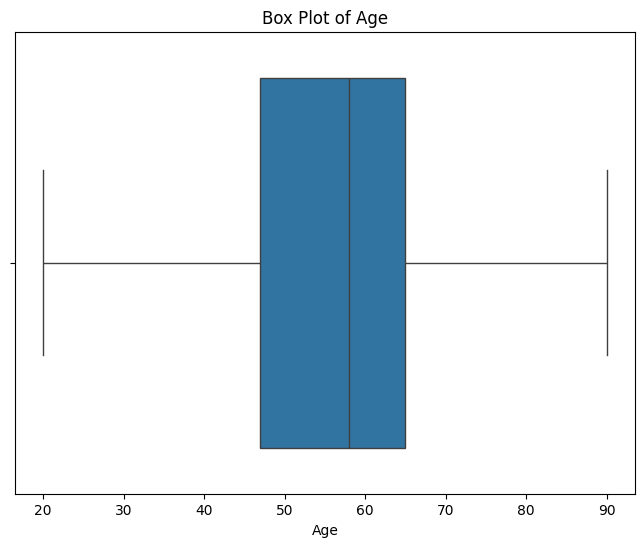

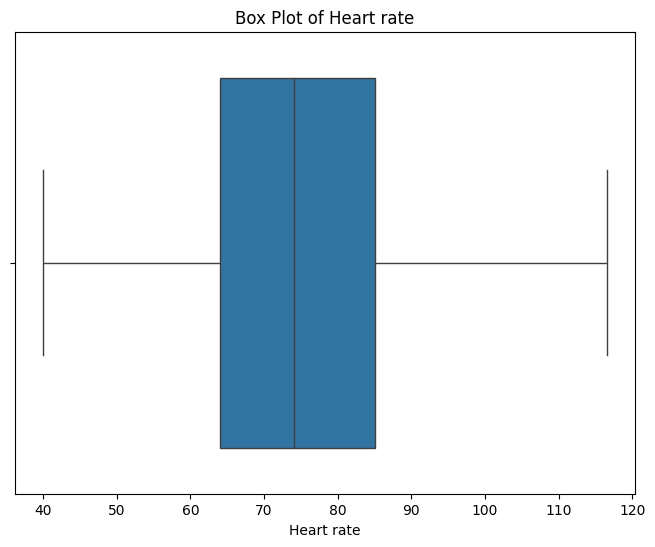

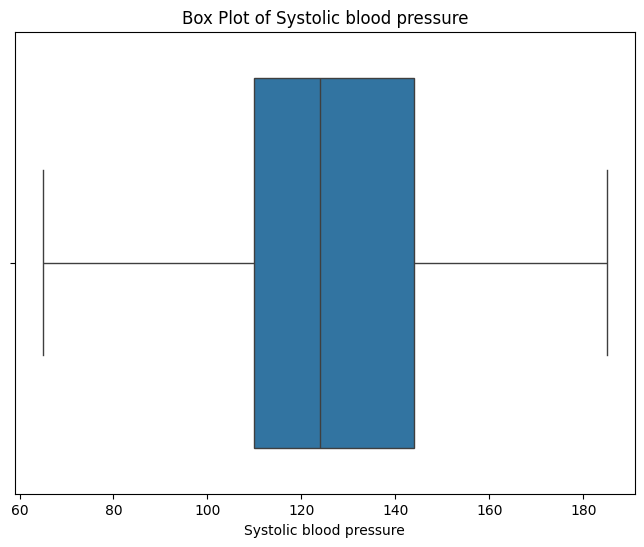

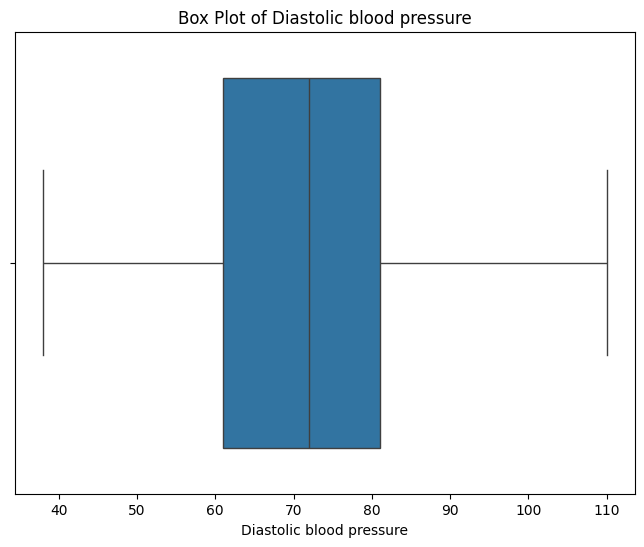

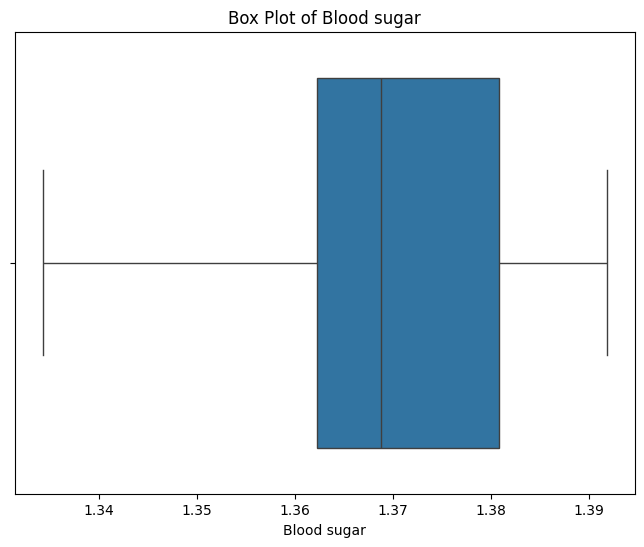

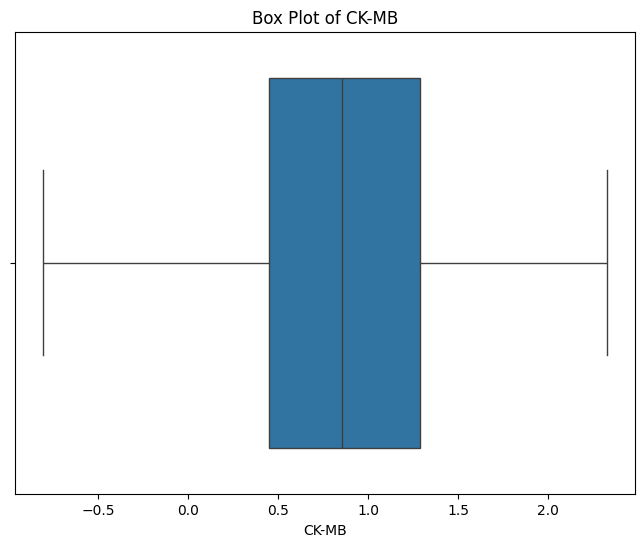

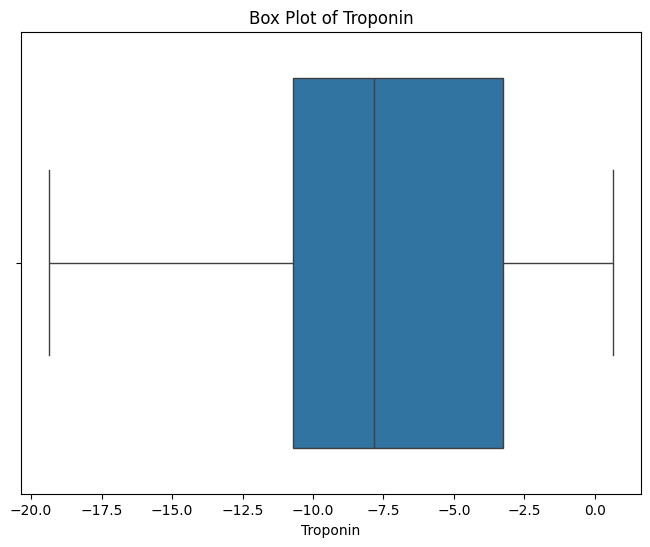

In [ ]:
for column in X_train.columns:
    if column != 'Gender':
     plt.figure(figsize=(8, 6))
     sns.boxplot(x=X_train[column])
     plt.title(f'Box Plot of {column}')
     plt.show()
     print("\n")

In [ ]:

X_val.loc[X_val['Age'] > 90, 'Age'] = 90
X_val.loc[X_val['Age'] < 20, 'Age'] = 20
X_val.loc[X_val['Blood sugar'] > 285, 'Blood sugar'] = 285
X_val.loc[X_val['Diastolic blood pressure'] > 110, 'Diastolic blood pressure'] = 110
X_val.loc[X_val['Systolic blood pressure'] > 180, 'Systolic blood pressure'] = 180
X_val.loc[X_val['Heart rate'] > 120, 'Heart rate'] = 120
X_val.loc[X_val['Heart rate'] < 40, 'Heart rate'] = 40
X_val.loc[X_val['CK-MB'] > 200, 'CK-MB'] = 200

X_val['CK-MB'], _ = stats.boxcox(X_val['CK-MB'])
X_val['Blood sugar'], _ = stats.boxcox(X_val['Blood sugar'])
X_val['Troponin'], _ = stats.boxcox(X_val['Troponin'])

X_test.loc[X_test['Age'] > 90, 'Age'] = 90
X_test.loc[X_test['Age'] < 20, 'Age'] = 20
X_test.loc[X_test['Blood sugar'] > 285, 'Blood sugar'] = 285
X_test.loc[X_test['Diastolic blood pressure'] > 110, 'Diastolic blood pressure'] = 110
X_test.loc[X_test['Systolic blood pressure'] > 180, 'Systolic blood pressure'] = 180
X_test.loc[X_test['Heart rate'] > 120, 'Heart rate'] = 120
X_test.loc[X_test['Heart rate'] < 40, 'Heart rate'] = 40
X_test.loc[X_test['CK-MB'] > 200, 'CK-MB'] = 200

X_test['CK-MB'], _ = stats.boxcox(X_test['CK-MB'])
X_test['Blood sugar'], _ = stats.boxcox(X_test['Blood sugar'])
X_test['Troponin'], _ = stats.boxcox(X_test['Troponin'])



In [ ]:
analysis_corr=pd.concat([X_train,y_train],axis=1)
analysis_corr

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Risk_Level
1156,64,0,116.5,112,74,1.375974,0.874980,-3.391049,0
1023,77,0,94.0,91,52,1.368538,0.328814,-6.093217,0
224,75,0,116.0,144,82,1.361449,1.083906,-8.308774,2
590,55,0,64.0,121,58,1.364196,1.682624,-0.146599,0
274,39,1,94.0,105,81,1.360164,1.083906,-12.332511,1
...,...,...,...,...,...,...,...,...,...
1095,50,0,85.0,119,76,1.372373,1.734346,-9.253846,0
1130,57,1,78.0,101,54,1.368234,-0.198099,-7.830759,1
1294,50,0,79.0,92,55,1.391853,1.752530,-11.419546,0
860,54,1,72.0,154,84,1.371612,0.895649,-10.139418,2


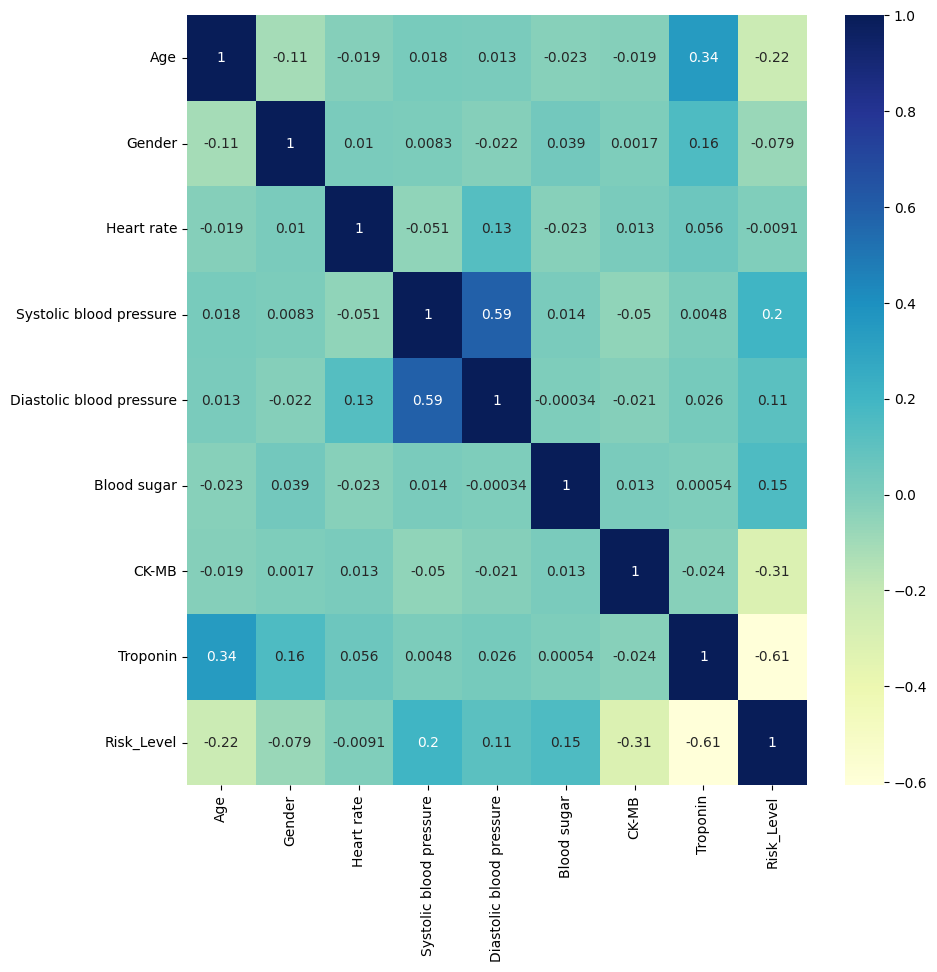

In [ ]:
corr = analysis_corr.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

<ipython-input-53-9dfdeb86a091>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=analysis_corr["Risk_Level"], palette='YlGnBu')


<Axes: xlabel='Risk_Level', ylabel='count'>

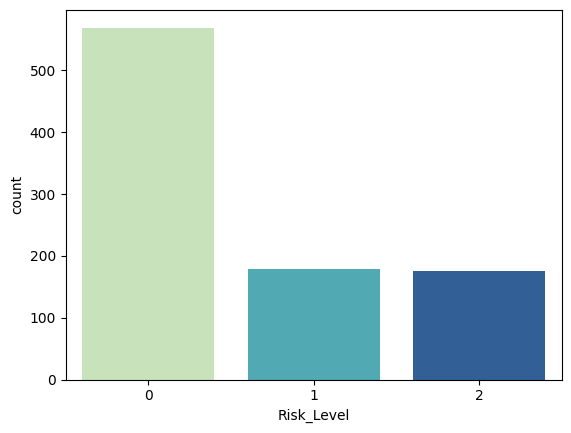

In [ ]:

sns.countplot(x=analysis_corr["Risk_Level"], palette='YlGnBu')

In [ ]:
analysis_corr['Risk_Level'].value_counts()

,count
Risk_Level,
0,569
1,179
2,175


In [ ]:


X_train_copy2 = X_train.copy()
X_val_copy2 = X_val.copy()
X_test_copy2 = X_test.copy()


In [ ]:
input_dim=X_train.shape[1]
input_dim

8

In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import ReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.layers import LeakyReLU, PReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization, Activation,
    LeakyReLU, PReLU
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers


stsc = ['Age', 'Diastolic blood pressure', 'Systolic blood pressure','Heart rate','CK-MB','Blood sugar']

minma = ['Troponin']

transformer = ColumnTransformer(transformers=[
    ('tnf1', StandardScaler(), stsc),
    ('tnf2', MinMaxScaler(), minma),

], remainder='passthrough')

X_train_transformed = transformer.fit_transform(X_train)
X_val_transformed = transformer.transform(X_val)
X_test_transformed = transformer.transform(X_test)




    
    - model_id=1: Balanced class 0 ~ avg(1,2), full class 1 & 2
    - model_id=2: Fewer class 0, oversampled class 1
    - model_id=3: Fewer class 0, oversampled class 2
    



---

## ✅ Feature Scaling Strategy: MinMax vs Standard Scaler

### 🔹 When I used **MinMaxScaler**:

* For features that were **uniformly or linearly distributed** without heavy tails or skewness.
* Ensures data is scaled between **\[0, 1]**, preserving the shape of the original distribution.

#### 📌 **Formula:**

$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

---

### 🔹 When I used **StandardScaler**:

* For features that had a **non-normal, uneven, or skewed distribution**.
* Transformed the feature to have **mean = 0** and **standard deviation = 1**.
* Helpful for models like ANN or SVM that are sensitive to feature scale and assume Gaussian-like behavior in inputs.

#### 📌 **Formula:**

$$
X_{\text{standardized}} = \frac{X - \mu}{\sigma}
$$

Where:

* $\mu$ = mean of the feature
* $\sigma$ = standard deviation of the feature

---

### 🧠 Why This Approach Works:

* **MinMaxScaler** retains the original distribution's shape — good for uniformly spread features.
* **StandardScaler** normalizes scale while dampening the influence of skewed values — ideal for non-uniform data.

> ✅ Using the appropriate scaler based on the **distribution of each feature** improves model convergence and stability.

---



In [ ]:


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=12,
    restore_best_weights=True
)

In [ ]:
layer = LeakyReLU(alpha=0.01)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:

from scipy import stats
from sklearn.utils import resample

In [ ]:
def custom_balanced_data(X_train_trans, y_train, model_id, random_state=None):


    df_train = pd.DataFrame(X_train_trans)
    df_train['Risk_Level'] = y_train.reset_index(drop=True)

    # O
    original_counts = df_train['Risk_Level'].value_counts()
    avg_minority = int((original_counts[1] + original_counts[2]) / 2)

    if model_id == 1:
        n_class0 = avg_minority
        n_class1 = original_counts[1]
        n_class2 = original_counts[2]
    elif model_id == 2:
        n_class0 = int(avg_minority * 0.8)
        n_class1 = int(original_counts[1] * 1.2)
        n_class2 = original_counts[2]
    else:

        n_class0 = int(avg_minority * 0.8)
        n_class1 = original_counts[1]
        n_class2 = int(original_counts[2] * 1.2)


    samples = []
    for class_idx, target_count in zip([0, 1, 2], [n_class0, n_class1, n_class2]):
        df_class = df_train[df_train['Risk_Level'] == class_idx]


        replace = len(df_class) < target_count
        df_class_sampled = resample(df_class,
                                   replace=replace,
                                   n_samples=target_count,
                                   random_state=random_state)
        samples.append(df_class_sampled)

    df_balanced = pd.concat(samples)
    df_balanced = df_balanced.sample(frac=1, random_state=random_state).reset_index(drop=True)

    return df_balanced.drop(columns=['Risk_Level']), df_balanced['Risk_Level']

In [ ]:
y_train.value_counts()

,count
Risk_Level,
0,569
1,179
2,175


In [ ]:
def create_model(layers, input_dim, dropout_rate, n_classes=3, activation="leakyrelu",
                learning_rate=0.01, l2_reg=0.002):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim=input_dim,
                          kernel_initializer=tf.keras.initializers.HeUniform(),
                          kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
        else:
            model.add(Dense(nodes, kernel_initializer=tf.keras.initializers.HeUniform(),
                          kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))

        model.add(BatchNormalization())


        if activation == "prelu":
            model.add(PReLU())
        elif activation == "leakyrelu":
            model.add(LeakyReLU(alpha=0.01))
        else:
            model.add(Activation(activation))

        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    model.add(Dense(n_classes, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

Absolutely! Here's a **clear explanation and math breakdown** of the key components used in your ANN code — especially:

* **L2 regularization**
* **Dropout**
* **ReLU activation function**

Formatted perfectly for a Colab **markdown text cell**:

---

## 🧮 Key Concepts in the Model Architecture

### 🔹 **1. L2 Regularization (Weight Decay)**

L2 regularization helps reduce overfitting by **penalizing large weight values** during training.

$$
\text{L2 Loss} = \lambda \sum_{j} w_j^2
$$

Where:

* $w_j$ = individual weights in the network
* $\lambda$ = regularization strength (in your code: `l2_reg=0.002`)

✅ This term is added to the total loss, encouraging the model to keep weights **small and smooth**, which improves generalization.

---

### 🔹 **2. Dropout**

Dropout randomly **disables a fraction of neurons** during training to prevent co-adaptation of neurons.

$$
\text{Dropout Rate} = p
$$

Where:

* $p$ = fraction of neurons to "drop" (set to zero) during each training step
* In your code: `dropout_rate` is a user-defined parameter (e.g., 0.3 means 30% of neurons dropped)

✅ Helps in **regularization** by introducing randomness and reducing dependency on specific nodes.

---

### 🔹 **3. ReLU Activation Function**

ReLU (**Rectified Linear Unit**) is a non-linear activation used to introduce non-linearity in the network:

$$
\text{ReLU}(x) = \max(0, x)
$$

* Outputs zero if the input is negative, else passes it through unchanged.
* Commonly used due to **simplicity** and efficient gradient flow.

#### Variants used in your code:

* `LeakyReLU(α=0.01)`:

  $$
  \text{LeakyReLU}(x) =
  \begin{cases}
    x, & \text{if } x > 0 \\
    \alpha x, & \text{if } x \leq 0
  \end{cases}
  $$

  Allows a small gradient ($\alpha$) when $x \leq 0$ to prevent dying neurons.

* `PReLU`: Parametric ReLU — similar to LeakyReLU, but **learns α** during training.





In [ ]:
from sklearn.utils.class_weight import compute_class_weight



def get_class_weights(y):
    classes = np.unique(y)
    weights = compute_class_weight('balanced', classes=classes, y=y)
    return dict(zip(classes, weights))



In [ ]:
X_train_transformed.shape[1]

8

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


In [ ]:

import tensorflow as tf
import keras_tuner as kt



def build_model(hp):
    model = Sequential()


    num_layers = hp.Int('num_layers', min_value=1, max_value=4, step=1)

    for i in range(num_layers):
        units = hp.Int(f'units_{i}', min_value=8, max_value=18, step=2)
        l2_reg = hp.Float(f'l2_reg_{i}', min_value=0.0001, max_value=0.005, step=0.0005)

        if i == 0:
            model.add(Dense(units, input_dim=X_train.shape[1],
                            kernel_initializer=tf.keras.initializers.HeUniform(),
                            kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
        else:
            model.add(Dense(units, kernel_initializer=tf.keras.initializers.HeUniform(),
                            kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))

        model.add(BatchNormalization())


        activation = hp.Choice(f'activation_{i}', ['relu', 'leakyrelu', 'prelu'])

        if activation == "prelu":
            model.add(PReLU())
        elif activation == "leakyrelu":
            model.add(LeakyReLU(alpha=0.01))
        else:
            model.add(Activation(activation))


        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.05)
        model.add(Dropout(dropout_rate))

    model.add(Dense(22, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=hp.Choice('learning_rate', [0.001, 0.005, 0.01])
    )

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model




In [ ]:
models = []
early_stopping = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
tuner_1= kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,directory="my_dir",project_name='M1'
)


X_train_bal1, y_train_bal1 = custom_balanced_data(X_train_transformed, y_train,model_id=1,
                                                 random_state=42)

tuner_1.search(X_train_bal1, y_train_bal1, epochs=50, validation_data=(X_val_transformed, y_val),callbacks=[early_stopping])


best_model = tuner_1.get_best_models(num_models=1)[0]
models.append(best_model)


Trial 10 Complete [00h 00m 07s]
val_accuracy: 0.2525252401828766

Best val_accuracy So Far: 0.7828282713890076
Total elapsed time: 00h 01m 33s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
tuner_2= kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,directory="my_dir",project_name='M2'
)


X_train_bal2, y_train_bal2 = custom_balanced_data(X_train_transformed, y_train,model_id=2,
                                                 random_state=42)

tuner_2.search(X_train_bal2, y_train_bal2, epochs=50, validation_data=(X_val_transformed, y_val),callbacks=[early_stopping])
best_model_2 = tuner_2.get_best_models(num_models=1)[0]
models.append(best_model_2)

Trial 10 Complete [00h 00m 16s]
val_accuracy: 0.631313145160675

Best val_accuracy So Far: 0.6969696879386902
Total elapsed time: 00h 02m 15s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 40 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
tuner_3= kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,directory="my_dir",project_name='M3'
)


X_train_bal3, y_train_bal3 = custom_balanced_data(X_train_transformed, y_train,model_id=3,
                                                 random_state=42)

tuner_3.search(X_train_bal3, y_train_bal3, epochs=50, validation_data=(X_val_transformed, y_val),callbacks=[early_stopping])
best_model_3 = tuner_3.get_best_models(num_models=1)[0]
models.append(best_model_3)

Trial 15 Complete [00h 00m 11s]
val_accuracy: 0.29797980189323425

Best val_accuracy So Far: 0.7323232293128967
Total elapsed time: 00h 02m 37s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:

def ensemble_predict(models, X):
    predictions = []
    for model in models:
        pred = model.predict(X)
        predictions.append(pred)
    avg_pred = np.mean(predictions, axis=0)
    return np.argmax(avg_pred, axis=1)

In [ ]:
y_test.value_counts()

,count
Risk_Level,
0,124
1,46
2,28


In [ ]:
print("\nIndividual Model Performance:")
for i, model in enumerate(models, 1):
    y_pred = np.argmax(model.predict(X_test_transformed, verbose=0), axis=1)
    acc = accuracy_score(y_test, y_pred)
    print(f"Model {i} Test Accuracy: {acc:.4f}")
    print(f"Model {i} Class Distribution in Training: {np.bincount(y_train_bal1 if i==1 else y_train_bal2 if i==2 else y_train_bal3)}")


Individual Model Performance:
Model 1 Test Accuracy: 0.7980
Model 1 Class Distribution in Training: [177 179 175]
Model 2 Test Accuracy: 0.7980
Model 2 Class Distribution in Training: [141 214 175]
Model 3 Test Accuracy: 0.8232
Model 3 Class Distribution in Training: [141 179 210]


In [ ]:

y_pred_ensemble = ensemble_predict(models, X_test_transformed)


print("\nEnsemble Model Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       124
           1       0.61      0.91      0.73        46
           2       0.73      0.39      0.51        28

    accuracy                           0.81       198
   macro avg       0.76      0.73      0.72       198
weighted avg       0.84      0.81      0.81       198



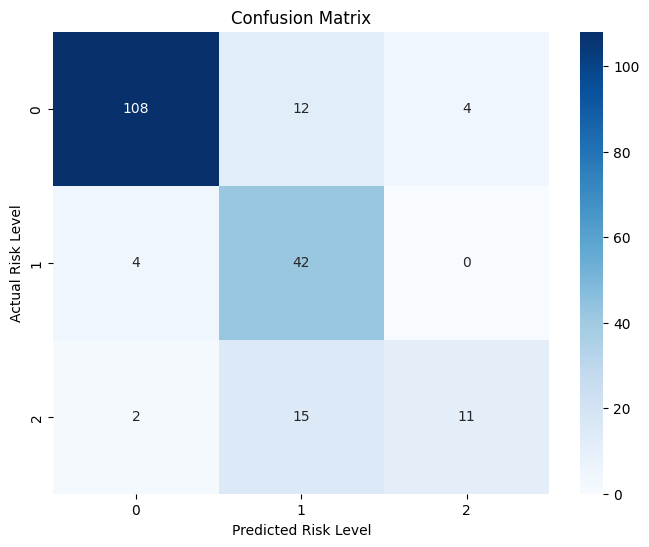

In [ ]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred_ensemble)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Risk Level')
plt.ylabel('Actual Risk Level')
plt.show()


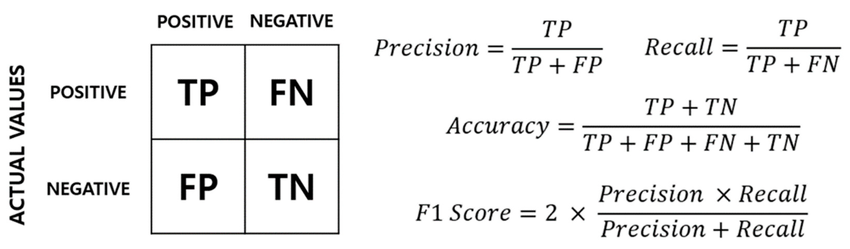